In [59]:
import sys
import calnet.calnet as cc
import calnet.dynamics as dyn
import numpy as np
from importlib import reload
import pdb
import matplotlib.pyplot as plt
import glob
import calnet.utils as utils
import pyute as ut
import size_contrast_analysis as sca
import naka_rushton_analysis as nra
reload(cc)
reload(utils)

<module 'calnet.utils' from '/Users/dan/Documents/code/adesnal/calnet/utils.py'>

In [60]:
# npyfile = np.load('../shared_data/calnet_data/dynamics/pc_small_opto_tavg_201203g.npy',allow_pickle=True)[()]
# npyfile = np.load('../shared_data/calnet_data/dynamics/connection_deletion_opto_tavg_201203g.npy',allow_pickle=True)[()]
npyfile = np.load('../shared_data/calnet_data/dynamics/vip_both_pixels_opto_tavg_210513c_baseline.npy',allow_pickle=True)[()]
# npyfile = np.load('../shared_data/calnet_data/dynamics/vip_chrimson_l4_opto_tavg_connection_deletion_201215b.npy',allow_pickle=True)[()]
# npyfile = np.load('../shared_data/calnet_data/dynamics/l4_opto_tavg_vip_silencing_201203g.npy',allow_pickle=True)[()]


In [61]:
# npyfile = np.load('../shared_data/calnet_data/dynamics/connection_deletion_opto_tavg_201215b.npy',allow_pickle=True)[()]
npyfile = np.load('../shared_data/calnet_data/dynamics/pc_one_pixel_opto_tavg_210513c.npy',allow_pickle=True)[()]

In [62]:
# opto_levels = np.array((0,))
opto_levels = np.linspace(-1.5,1.5,31)
# opto_levels = 1*np.linspace(-1,1,21)
# opto_levels = np.array((-0.3,0,0.3))

In [58]:
npyfile.keys()

dict_keys(['YY_opto', 'YY_opto_no_pcpc', 'YY_opto_no_pcpv', 'YY_opto_tavg_no_pcvip', 'YY_opto_tavg_no_pcsst', 'YY_opto_tavg_no_vipbias', 'YY_opto_tavg_no_sstvip'])

In [6]:
# note: these simulations keep resEta, resXi fixed. Not Eta, Xi!
YY_opto = npyfile['YY_opto'][:,:,:,np.newaxis,:]
YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]
YY_opto_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][:,:,:,np.newaxis,:]
YY_opto_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][:,:,:,np.newaxis,:]
YY_opto_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][:,:,:,np.newaxis,:]

In [12]:
# weights_files = glob.glob('../shared_data/calnet_data/weights/weights_201203g/*.npy')
# weights_files = glob.glob('../shared_data/calnet_data/weights/weights_201215b/*.npy')
weights_files = glob.glob('../shared_data/calnet_data/weights/weights_210513c/*.npy')
weights_files.sort()

reload(cc)
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
losses = np.zeros((nwt,))
for iwt in range(nwt):
#     wtfile = 'weights_'+good_fits[iwt]+'.npy'
#     wtdict = np.load(wtbase+wtfile,allow_pickle=True)[()]
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)
    losses[iwt] = mdls[iwt].loss
    
mdls_no_pcpv = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][[0,0,3,3],[0,3,0,3]] = 0
    mdls_no_pcpv[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcpc = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,0] = 0
    mdls_no_pcpc[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcvip = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,2] = 0
    wtdict['Wmx'][0,2] = 0
    mdls_no_pcvip[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcsst = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,1] = 0
    wtdict['Wmx'][0,1] = 0
    mdls_no_pcsst[iwt] = cc.ModelOri(wtdict,nT=1)
        
mdls_no_vipbias = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmx'][1,2] = 0
    mdls_no_vipbias[iwt] = cc.ModelOri(wtdict,nT=1)

In [13]:
iwt = 0
nQ,nS,nT = mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
bltiles = np.zeros((nwt,nQ*nS*nT))
amps = np.ones((nwt,nQ*nS*nT))
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    if 'bl' in wtdict:
        bl = wtdict['bl']
        bltiles[iwt] = np.tile(bl,nS*nT)
    if 'amp' in wtdict:
        amp = wtdict['amp']
        amps[iwt] = amp

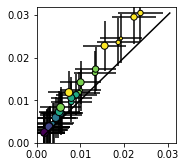

In [14]:
plt.figure(figsize=(2.5,2.5))
sca.scatter_size_contrast_errorbar(YY_opto[:,0,:,0,0],YY_opto_no_pcsst[:,0,:,0,0],nsize=6,ncontrast=6)
ut.zero_origin('xy')

In [15]:
    low_loss = (losses<np.nanpercentile(losses,10))
    
    mdls = [mdl for (mdl,ll) in zip(mdls,low_loss) if ll]
    mdls_no_pcpv = [mdl for (mdl,ll) in zip(mdls_no_pcpv,low_loss) if ll]
    mdls_no_pcpc = [mdl for (mdl,ll) in zip(mdls_no_pcpc,low_loss) if ll]
    mdls_no_pcvip = [mdl for (mdl,ll) in zip(mdls_no_pcvip,low_loss) if ll]
    mdls_no_pcsst = [mdl for (mdl,ll) in zip(mdls_no_pcsst,low_loss) if ll]
    mdls_no_vipbias = [mdl for (mdl,ll) in zip(mdls_no_vipbias,low_loss) if ll]
    
#     YY_opto = npyfile['YY_opto'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][low_loss,:,:,np.newaxis,:]
    
    YY_opto = npyfile['YY_opto'][:,:,:,np.newaxis,:]
    YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
    YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]
    YY_opto_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][:,:,:,np.newaxis,:]
    YY_opto_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][:,:,:,np.newaxis,:]
    YY_opto_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][:,:,:,np.newaxis,:]

    losses = losses[low_loss]
    
    nwt = len(mdls)
    iwt = 0
    itype = 0

    nN = mdls[iwt].nN
    ntypes = mdls[iwt].nQ*mdls[iwt].nS*mdls[iwt].nT
    this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
    # this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
    # this_mdl,this_YY = mdls.copy(),YY_opto.copy()
    YYs = [YY_opto,YY_opto_no_pcpc,YY_opto_no_pcpv,YY_opto_no_pcvip,YY_opto_no_pcsst,YY_opto_no_vipbias]
    network_resps = [np.zeros((nwt,opto_levels.shape[0],nN,ntypes)) for YY in YYs]
    mdlses = [mdls,mdls_no_pcpc,mdls_no_pcpv,mdls_no_pcvip,mdls_no_pcsst,mdls_no_vipbias]
#     network_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
#     network_resp_no_pcpc = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
#     network_resp_no_pcpv = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
#     network_resp_no_pcvip = np.zeros((nwt,3,nN,ntypes))
    cell_intrinsic_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    for network_resp,YY in zip(network_resps,YYs):
        for iwt in range(nwt):
            network_resp[iwt] = np.nanmean(YY[iwt],2)
#     for iwt in range(nwt):
#         network_resp[iwt] = np.nanmean(YY_opto[iwt],2) # time avg
#         network_resp_no_pcpc[iwt] = np.nanmean(YY_opto_no_pcpc[iwt],2)
#         network_resp_no_pcpv[iwt] = np.nanmean(YY_opto_no_pcpv[iwt],2)
#         network_resp_no_pcvip[iwt] = np.nanmean(YY_opto_no_pcvip[iwt],2)

        for ilevel in range(opto_levels.shape[0]):
            cell_intrinsic_resp[iwt,ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)
            

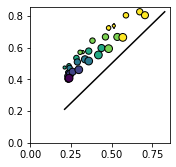

In [32]:
#    YYs = [YY_opto,YY_opto_no_pcpc,YY_opto_no_pcpv,YY_opto_no_pcvip,YY_opto_no_pcsst,YY_opto_no_vipbias]
itype = 1

plt.figure(figsize=(2.5,2.5))
sca.scatter_size_contrast_errorbar(network_resps[0][:,0,:,itype],network_resps[3][:,0,:,itype],nsize=6,ncontrast=6)
ut.zero_origin('xy')

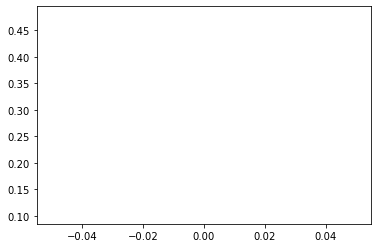

In [33]:
plt.figure()
for ifit in range(network_resp.shape[0]):
    plt.plot(network_resp[ifit,:,0,0])

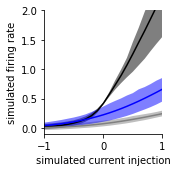

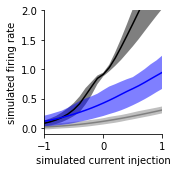

In [17]:
pct_l,pct_u = 16,84
#YY_opto,YY_opto_no_pcpc,YY_opto_no_pcpv,YY_opto_no_pcvip,YY_opto_no_pcsst,YY_opto_no_vipbias
network_resp,network_resp_no_pcpc,network_resp_no_pcpv,network_resp_no_pcvip,network_resp_no_pcsst,network_resp_no_vipbias = network_resps
for istim,title in zip([0,5],['0% contrast','5$^o$ size, 100% contrast']):
    plt.figure(figsize=(2.5,2.5))
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    #YY_opto,YY_opto_no_pcpc,YY_opto_no_pcpv,YY_opto_no_pcvip,YY_opto_no_pcsst,YY_opto_no_vipbias
    plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpc,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpc,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpv,0)[:,istim,itype],c=np.array((0,0,1)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpv,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpv,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0,0,1)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    # plt.legend()
    plt.xlim((-1,1))
    plt.ylim((-0.1,2))
    ut.erase_top_right()
    plt.xlabel('simulated current injection')
    plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
    plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc_stim_%d_no_title.jpg'%istim,dpi=300)
#     plt.title(title)
    plt.tight_layout()
    plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc_stim_%d.jpg'%istim,dpi=300)


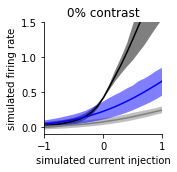

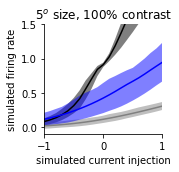

In [63]:
pct_l,pct_u = 16,84
xlims = [(0.3,0.7),(0.7,1.3)]
ylims = [(0.2,0.6),(0.6,1.3)]
for istim,title,xlim,ylim in zip([0,5],['0% contrast','5$^o$ size, 100% contrast'],xlims,ylims):
    plt.figure(figsize=(2.5,2.5))
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpc,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpc,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpv,0)[:,istim,itype],c=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpv,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpv,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
    # plt.legend()
#     plt.xlim(xlim)
#     plt.ylim(ylim)
    plt.xlim((-1,1))
    plt.ylim((-0.1,1.5))
    ut.erase_top_right()
    plt.xlabel('simulated current injection')
    plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d_no_title.jpg'%istim,dpi=300)
    plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d.jpg'%istim,dpi=300)


In [76]:
np.digitize(mdls[0].XX[:,0],opto_levels)

array([21, 22, 23, 23, 25, 26, 21, 22, 23, 23, 25, 26, 21, 22, 23, 24, 25,
       26, 21, 22, 23, 24, 25, 25, 21, 22, 23, 23, 23, 23, 21, 22, 22, 22,
       22, 22])

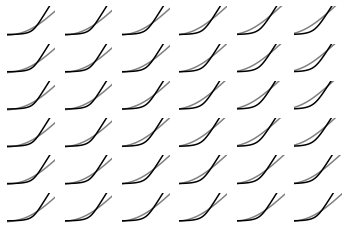

In [19]:
ibaseline = 15
ilow = 10#12
ihigh = 20#18
itype = 0
dr,dr_intrinsic,dr_up,dr_down = [np.zeros((nwt,6,6)) for ivar in range(4)]

def compute_dr(network_resp,iopto,ibaseline,itype=0):
    dr = np.reshape(network_resp[:,iopto,:,itype] - network_resp[:,ibaseline,:,itype],(nwt,6,6))
    return dr

dr = compute_dr(network_resp,ibaseline+1,ibaseline-1)#np.reshape(network_resp[:,ibaseline+1,:,itype]-network_resp[:,ibaseline-1,:,itype],(nwt,6,6))
dr_intrinsic = compute_dr(cell_intrinsic_resp,ibaseline+1,ibaseline-1)#np.reshape(cell_intrinsic_resp[:,ibaseline+1,:,itype]-cell_intrinsic_resp[:,ibaseline-1,:,itype],(nwt,6,6))
dr_up = compute_dr(network_resp,ihigh,ibaseline)# np.reshape(network_resp[:,ihigh,:,itype] - network_resp[:,ibaseline,:,itype],(nwt,6,6))
dr_down = compute_dr(network_resp,ilow,ibaseline)# np.reshape(network_resp[:,ilow,:,itype] - network_resp[:,ibaseline,:,itype],(nwt,6,6))

plt.figure()
for istim in range(this_mdl[iwt].nN):
    plt.subplot(6,6,istim+1)

    plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp[:,:,istim,itype],0),c=np.array((0.5,0.5,0.5)))
    plt.plot(opto_levels,np.nanmean(network_resp[:,:,istim,itype],0),c='k')
    plt.xlim((-1.5,1.5))
    plt.ylim((-0.1,2))
#     plt.axvline(0,c='k',linestyle='dashed')
    ut.erase_top_right()
    plt.axis('off')
#     plt.xlabel('simulated current injection')
#     plt.ylabel('simulated firing rate')
#     plt.title('PC$\leftrightarrow$PC weights deleted')
#     plt.tight_layout()
# plt.savefig('figures/intrinsic_vs_network_nonlinearity_no_wpcpc.eps')

In [38]:
import sim_utils
def this_gen_size_tuning(flsc):
    shp = flsc.shape
    rflsc = flsc.reshape((shp[0]*shp[1],shp[2],shp[3]))
    size_tuning = sim_utils.gen_size_tuning(rflsc).reshape((shp[0],shp[1],shp[2]+1,shp[3]))
    return size_tuning

IndexError: index 15 is out of bounds for axis 1 with size 1

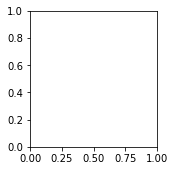

In [39]:
usize = np.array((5,8,13,22,36,60))
usize0 = np.array((0,5,8,13,22,36,60))
ilights = [ibaseline,ibaseline-5]
nlights = len(ilights)
plt.figure(figsize=(5,2.5))
for iicontrast,icontrast in enumerate([1,5]):
    plt.subplot(1,2,iicontrast+1)
    ydata = this_gen_size_tuning(network_resp[:,ilights][:,:,:,itype].reshape((nwt,nlights,6,6)))[:,:,:,icontrast]
    ut.plot_pct_errorbars_hillel(usize0,ydata)
    plt.ylim((0,1.1))


In [323]:
ibaseline = 10
ilow = 5
ihigh = 15
plt.figure(figsize=(2.5,2.5))
xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
ydata = network_resp[:,ilow,:,itype].reshape((-1,6,6))
sca.scatter_size_contrast_errorbar(xdata,ydata)

plt.figure(figsize=(2.5,2.5))
xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
sca.scatter_size_contrast_errorbar(xdata,ydata)

IndexError: index 10 is out of bounds for axis 1 with size 1

<Figure size 180x180 with 0 Axes>

In [324]:
opto_levels[[7,10,13]]

IndexError: index 7 is out of bounds for axis 0 with size 1

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


-0.0028335389166249908
linewidth: 1
plotting
linewidth: 1
plotting
0.07513434243516973
linewidth: 1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


plotting
linewidth: 1
plotting


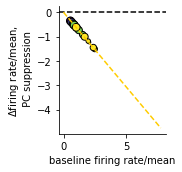

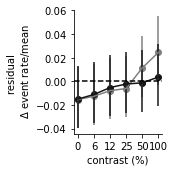

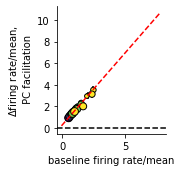

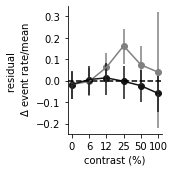

In [24]:
ibaseline = 10
ilow = 7
ihigh = 13
# ibaseline = 1
# ilow = 0
# ihigh = 2

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst

light_lbls = ['suppression','facilitation']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
for ilight,light_lbl,c,ylim in zip([ilow,ihigh],light_lbls,cs,ylims):

    plt.figure(figsize=(2.5,2.5))
    ydata = network_resp[:,ilight,:,itype].reshape((-1,6,6))
    ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
#     ut.zero_origin('x')
    plt.xlabel('baseline firing rate/mean')
    plt.ylabel('$\Delta$firing rate/mean, \n PC %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    xs = np.array((xdata_norm.min(),xdata_norm.max()))
    plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
#     plt.ylim(ylim)
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig('figures/delta_rate_vs_rate_l4_%s.eps'%light_lbl)
    
    plt.figure(figsize=(2.5,2.5))
    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
    these_sizes = [0,5]
    ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84))
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(this_ncontrast),ucontrast)
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
    plt.ylabel('residual \n $\Delta$ event rate/mean')
#     plt.ylim((-0.1,0.15))
    plt.tight_layout()
#     plt.savefig('figures/residual_delta_rate_vs_contrast_l4_%s.eps'%light_lbl)

# plt.figure(figsize=(2.5,2.5))
# xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
# ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
# sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
# plt.axhline(0,c='k',linestyle='dashed')
# ut.zero_origin('x')


In [326]:
actual.shape

(38, 6, 6)

In [327]:
network_resp_no_pcvip.shape

(43, 1, 36, 8)

In [328]:
ibaseline = 1
ilow = 0
ihigh = 2
# ibaseline = 1
# ilow = 0
# ihigh = 2

import scipy.stats as sst

light_lbls = ['suppression','facilitation']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

xdata = network_resp_no_pcvip[:,ibaseline,:,itype].reshape((-1,6,6))
xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
for ilight,light_lbl,c,ylim in zip([ilow,ihigh],light_lbls,cs,ylims):

    plt.figure(figsize=(2.5,2.5))
    ydata = network_resp_no_pcvip[:,ilight,:,itype].reshape((-1,6,6))
    ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
#     ut.zero_origin('x')
    plt.xlabel('baseline firing rate/mean')
    plt.ylabel('$\Delta$firing rate/mean, \n PC %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    xs = np.array((xdata_norm.min(),xdata_norm.max()))
    plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    plt.ylim(ylim)
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig('figures/delta_rate_vs_rate_l4_no_wpcvip_%s.eps'%light_lbl)
    
    plt.figure(figsize=(2.5,2.5))
    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
    these_sizes = [0,5]
    ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84))
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(this_ncontrast),ucontrast)
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
    plt.ylabel('residual \n $\Delta$ event rate/mean')
    plt.ylim((-0.1,0.15))
    plt.tight_layout()
#     plt.savefig('figures/residual_delta_rate_vs_contrast_no_wpcvip_l4_%s.eps'%light_lbl)
    

# plt.figure(figsize=(2.5,2.5))
# xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
# ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
# sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
# plt.axhline(0,c='k',linestyle='dashed')
# ut.zero_origin('x')


IndexError: index 1 is out of bounds for axis 1 with size 1

In [329]:
ibaseline = 1
ilow = 0
ihigh = 2
# ibaseline = 1
# ilow = 0
# ihigh = 2

import scipy.stats as sst

light_lbls = ['suppression','facilitation']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

xdata = network_resp_vip_sil[:,ibaseline,:,itype].reshape((-1,6,6))
xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
for ilight,light_lbl,c in zip([ilow,ihigh],light_lbls,cs):

    plt.figure(figsize=(2.5,2.5))
    ydata = network_resp_vip_sil[:,ilight,:,itype].reshape((-1,6,6))
    ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
#     ut.zero_origin('x')
    plt.xlabel('baseline firing rate/mean')
    plt.ylabel('$\Delta$firing rate/mean, \n PC %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    xs = np.array((xdata_norm.min(),xdata_norm.max()))
    plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig('figures/delta_rate_vs_rate_l4_%s.eps'%light_lbl)
    

# plt.figure(figsize=(2.5,2.5))
# xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
# ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
# sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
# plt.axhline(0,c='k',linestyle='dashed')
# ut.zero_origin('x')


NameError: name 'network_resp_vip_sil' is not defined

In [330]:
ibaseline = 15
ilow = 14
ihigh = 16

import scipy.stats as sst

light_lbls = ['suppression','facilitation']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

xdata = network_resp_no_pcpc[:,ibaseline,:,itype].reshape((-1,6,6))
for ilight,light_lbl,c in zip([ilow,ihigh],light_lbls,cs):

    plt.figure(figsize=(2.5,2.5))
    ydata = network_resp_no_pcpc[:,ilight,:,itype].reshape((-1,6,6))
    sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
    ut.zero_origin('x')
    plt.xlabel('baseline firing rate')
    plt.ylabel('$\Delta$firing rate, \n PC %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata.flatten(), (ydata-xdata).flatten())
    xs = np.array((xdata.min(),xdata.max()))
    plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    ut.erase_top_right()
#     plt.savefig('figures/delta_rate_vs_rate_pc_%s.eps')
    

# plt.figure(figsize=(2.5,2.5))
# xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
# ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
# sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
# plt.axhline(0,c='k',linestyle='dashed')
# ut.zero_origin('x')


IndexError: index 15 is out of bounds for axis 1 with size 1

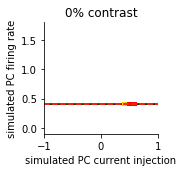

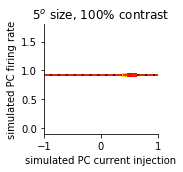

In [172]:
for istim,title in zip([0,5],['0% contrast','5$^o$ size, 100% contrast']):
    plt.figure(figsize=(2.5,2.5))
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
    plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    lb,ub = [np.nanpercentile(network_resp[:,:,istim,itype],pct,axis=0) for pct in [pct_l,pct_u]]
    plt.fill_between(opto_levels,lb,ub,facecolor='k',alpha=0.5)
#     plt.fill_between(opto_levels[ilow:ibaseline+1],lb[ilow:ibaseline+1],ub[ilow:ibaseline+1],facecolor=np.array((1,0.8,0)))
    plt.plot(opto_levels[ilow:ibaseline+1],np.nanmean(network_resp,0)[:,istim,itype][ilow:ibaseline+1],c=np.array((1,0.8,0)),label='baseline',linewidth=4)
    plt.plot(opto_levels[ibaseline:ihigh+1],np.nanmean(network_resp,0)[:,istim,itype][ibaseline:ihigh+1],c=np.array((1,0,0)),label='baseline',linewidth=4)
#     plt.axvline(0,c='k',linestyle='dashed')
#     plt.axhline(0,c='k',linestyle='dashed')
    plt.axhline(np.nanmean(network_resp,0)[:,istim,itype][ibaseline],c='k',linestyle='dashed')
    plt.axhline(np.nanmean(network_resp,0)[:,istim,itype][ilow],c=np.array((1,0.8,0)),linestyle='dashed')
    plt.axhline(np.nanmean(network_resp,0)[:,istim,itype][ihigh],c=np.array((1,0,0)),linestyle='dashed')
#     plt.axvline(opto_levels[ilow],c=np.array((1,0.8,0)))
#     plt.axvline(opto_levels[ihigh],c=np.array((1,0,0)))

    #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    # plt.legend()
    plt.xlim((-1,1))
    plt.ylim((-0.1,1.8))
    ut.erase_top_right()
    plt.xlabel('simulated PC current injection')
    plt.ylabel('simulated PC firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_l4_%d_opto_colors.jpg'%istim,dpi=300)

In [19]:
import calnet.utils
reload(calnet.utils)
couplingses = [None for _ in network_resps]
for iconn in range(len(network_resps)):
    couplingses[iconn] = calnet.utils.compute_couplings(network_resps[iconn],mdlses[iconn])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


linewidth: 1
plotting
linewidth: 1
plotting
linewidth: 1
plotting


NameError: name 'ucontrast' is not defined

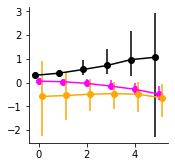

In [20]:
iconn = 0
i,j = 4,0
isize = 3
ilight = 0
plt.figure(figsize=(2.5,2.5))
# for iconn in [0,3]:
colors = np.array(((0,0,0),(1,0,1),(1,0.65,0)))
cpl = np.concatenate([couplingses[iconn][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
#     plt.subplot(2,3,iconn+1)
ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.xticks(np.arange(6),ucontrast)
plt.axhline(0,c='k',linestyle='dashed')
plt.xlabel('contrast (%)')
plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
plt.tight_layout()
# plt.savefig('figures/far_pc_coupling_pcsst_pcvip_deleted_no_opto.jpg',dpi=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


linewidth: 0
linewidth: 0
linewidth: 0


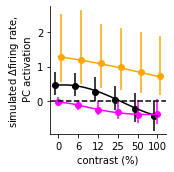

In [53]:
reload(ut)
iconn = 0
i,j = 4,0
isize = 3
# ilight = 0
ilight = 15
plt.figure(figsize=(2.5,2.5))
# for iconn in [0,3]:
colors = np.array(((0,0,0),(1,0,1),(1,0.65,0)))
cpl = np.concatenate([couplingses[iconn][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
#     plt.subplot(2,3,iconn+1)

# def plot_parametric_fn_pct_errorbars(x,cpl,fit_fn=nra.fit_opt_params_two_asymptote_fn,plot_fn=nra.two_asymptote_fn,colors=None):
#     if colors is None:
#         colors = plt.cm.viridis(np.linspace(0,1,cpl.shape[1]))
#     for iconn in range(cpl.shape[1]):
#         params,_ = nra.fit_opt_params_two_asymptote_fn(x,np.nanpercentile(cpl[:,iconn],50,axis=0)[np.newaxis])
#         to_plot = nra.two_asymptote_fn(x,*params[0])
#         plt.plot(x,to_plot,c=colors[iconn])
#     ut.plot_pct_errorbars_hillel(x,cpl,delta=0.1,pct=(16,84),colors=colors,linewidth=0)
ut.plot_parametric_fn_pct_errorbars(np.arange(6),cpl,fit_fn=nra.fit_opt_params_two_asymptote_fn,plot_fn=nra.two_asymptote_fn,colors=colors,delta=0.1)
plt.ylim((-0.95,2.75))
ut.erase_top_right()
plt.xticks(np.arange(6),ucontrast)
plt.axhline(0,c='k',linestyle='dashed')
plt.xlabel('contrast (%)')
plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
plt.tight_layout()
plt.savefig('figures/far_pc_coupling_pcsst_pcvip_deleted_no_opto.eps')

In [43]:
len([*params])

1

In [36]:
params.shape

(94, 6)

In [ ]:
iconn = 0
i,j = 4,0
isize = 3
# ilight = 0
ilight = 15
plt.figure(figsize=(2.5,2.5))
# for iconn in [0,3]:
colors = np.array(((0,0,0),(1,0,1),(1,0.65,0)))
cpl = np.concatenate([couplingses[iconn][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0]],axis=1)
plt.ylim((-0.95,2.75))
#     plt.subplot(2,3,iconn+1)
ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.xticks(np.arange(6),ucontrast)
plt.axhline(0,c='k',linestyle='dashed')
plt.xlabel('contrast (%)')
plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
plt.tight_layout()
# plt.savefig('figures/far_pc_coupling_no_opto.eps')

In [21]:
couplingses[iconn].shape

(94, 31, 6, 6, 8, 8)

In [372]:
couplingses[0].shape

(43, 1, 6, 6, 8, 8)

WilcoxonResult(statistic=1104.0, pvalue=2.0858274924721944e-05)
WilcoxonResult(statistic=9.0, pvalue=5.086701669983556e-17)


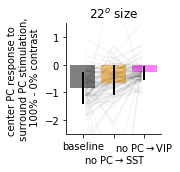

In [55]:
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
icontrast1,icontrast2 = 0,5
ilight = 15
isize = 3
arr1 = couplingses[0][:,ilight,isize,:,i,j]
arr2 = couplingses[4][:,ilight,isize,:,i,j]
arr3 = couplingses[3][:,ilight,isize,:,i,j]
data1,data2,data3 = [arr[:,icontrast2] - arr[:,icontrast1] for arr in [arr1,arr2,arr3]]
datas = np.concatenate((data1[:,np.newaxis],data2[:,np.newaxis],data3[:,np.newaxis]),axis=1)
colors = np.array(((0,0,0),(1,0.65,0),(1,0,1)))
xticklabels = ['baseline','\n '+r'no PC$\rightarrow$SST',r'no PC$\rightarrow$VIP']
# ut.plot_bars_with_lines(datas,colors=colors,xticklabels=xticklabels,errorstyle='pct',alpha=0.025)
ut.plot_bars_with_lines(datas,colors=colors,xticklabels=xticklabels,errorstyle='pct',alpha=0.01,pct=(16,84))
plt.ylim((-2.5,1.5))
# plt.ylim((-3.5,3.5))
plt.ylabel('center PC response to \n surround PC stimulation, \n 100% - 0% contrast')
plt.title('22$^o$ size')
ut.erase_top_right()
plt.tight_layout()
print(sst.wilcoxon(data1,data2))
print(sst.wilcoxon(data1,data3))
plt.savefig('figures/far_pc_coupling_pcsst_pcvip_deleted_no_opto_dynamic_range_bars.jpg',dpi=300)


In [23]:
dr_up = compute_dr(network_resp_no_pcpv,ihigh,ibaseline)
dr_down = compute_dr(network_resp_no_pcpv,ilow,ibaseline)

dr_up = compute_dr(network_resp,ihigh,ibaseline)
dr_down = compute_dr(network_resp,ilow,ibaseline)

isizes = [0,2,4]
this_nsize = len(isizes)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))
ucontrast = np.array((0,6,12,25,50,100))

plt.figure(figsize=(2.5,2.5))
ut.plot_pct_errorbars_hillel(np.arange(6),dr_up[:,isizes],pct=(16,84),colors=c_l23)
ut.erase_top_right()
plt.xticks(np.arange(6),ucontrast)
plt.axhline(0,c='k',linestyle='dashed')
plt.xlabel('contrast (%)')
plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
plt.tight_layout()
# plt.savefig('figures/sim_pc_activation_size_contrast.eps')

plt.figure(figsize=(2.5,2.5))
ut.plot_pct_errorbars_hillel(np.arange(6),dr_down[:,isizes],pct=(16,84),colors=c_l23)
ut.erase_top_right()
plt.xticks(np.arange(6),ucontrast)
plt.axhline(0,c='k',linestyle='dashed')
plt.xlabel('contrast (%)')
plt.ylabel('simulated $\Delta$firing rate, \n PC suppression')
plt.tight_layout()
# plt.savefig('figures/sim_pc_suppression_size_contrast.eps')

NameError: name 'compute_dr' is not defined

IndexError: index 25 is out of bounds for axis 1 with size 21

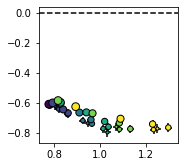

<Figure size 180x180 with 0 Axes>

In [244]:
ilight_halo = 5
ilight_chrimson = 25
ilight_off = 15

itype = 0
for ilight_light in [ilight_halo,ilight_chrimson]:
    plt.figure(figsize=(2.5,2.5))
    xdata = network_resp[:,ilight_off,:,itype].reshape((-1,6,6))
    ydata = network_resp[:,ilight_light,:,itype].reshape((-1,6,6))
    sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')

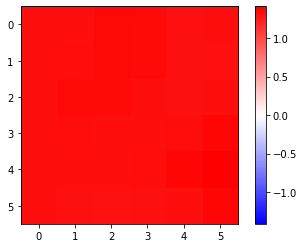

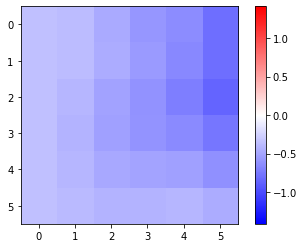

In [219]:
mx = np.maximum(np.max(np.abs(np.nanmean(dr_up,0))),np.max(np.abs(np.nanmean(dr_down,0))))
plt.figure()
ut.imshow_hot_cold(np.nanmean(dr_up,0),mx=mx)
plt.colorbar()
plt.figure()
ut.imshow_hot_cold(np.nanmean(dr_down,0),mx=mx)
plt.colorbar()

In [489]:
network_resp.shape

(38, 31, 36, 8)

In [5]:
iwt = 0
istim = 0
itype = 0
this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
# this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
# this_mdl,this_YY = mdls.copy(),YY_opto.copy()
network_resp = np.nanmean(YY_opto[iwt][:,istim,:,itype],1)
network_resp_no_pcpc = np.nanmean(YY_opto_no_pcpc[iwt][:,istim,:,itype],1)

cell_intrinsic_resp = np.zeros_like(opto_levels)
for ilevel in range(opto_levels.shape[0]):
    cell_intrinsic_resp[ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)[istim,itype]

plt.figure(figsize=(2.5,2.5))
plt.plot(opto_levels,cell_intrinsic_resp,c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
plt.plot(opto_levels,network_resp,c='k',label='baseline')
plt.plot(opto_levels,network_resp_no_pcpc,c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
# plt.legend()
plt.xlim((-1.5,1.5))
plt.ylim((-0.1,1.25))
ut.erase_top_right()
plt.xlabel('simulated current injection')
plt.ylabel('simulated firing rate')
# plt.title('PC$\leftrightarrow$PC weights deleted')
plt.tight_layout()
# plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc.eps')

NameError: name 'mdls_no_pcpc' is not defined

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


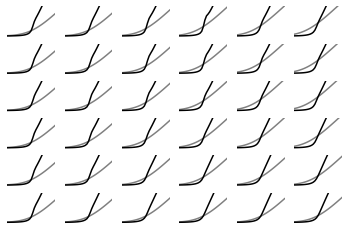

In [199]:
iwt = 0
istim = 0
itype = 0
ibaseline = 15
ilow = 10
ihigh = 20
# this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
# this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
this_mdl,this_YY = mdls.copy(),YY_opto.copy()
dr,dr_intrinsic,dr_up,dr_down = [np.zeros((6,6)) for ivar in range(4)]
plt.figure()
for istim in range(this_mdl[iwt].nN):
    network_resp = np.nanmean(this_YY[iwt][:,istim,:,itype],1)

    cell_intrinsic_resp = np.zeros_like(opto_levels)
    for ilevel in range(opto_levels.shape[0]):
        cell_intrinsic_resp[ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)[istim,itype]

    # plt.figure(figsize=(2.5,2.5))
        plt.subplot(6,6,istim+1)
    dr[np.unravel_index(istim,(6,6))] = (network_resp[ibaseline+1]-network_resp[ibaseline-1])
    dr_intrinsic[np.unravel_index(istim,(6,6))] = (cell_intrinsic_resp[ibaseline+1]-cell_intrinsic_resp[ibaseline-1])
    dr_up[np.unravel_index(istim,(6,6))] = network_resp[ihigh] - network_resp[ibaseline]
    dr_down[np.unravel_index(istim,(6,6))] = network_resp[ilow] - network_resp[ibaseline]

    plt.plot(opto_levels,cell_intrinsic_resp,c=np.array((0.5,0.5,0.5)))
    plt.plot(opto_levels,network_resp,c='k')
    plt.xlim((-1.5,1.5))
    plt.ylim((-0.1,2))
#     plt.axvline(0,c='k',linestyle='dashed')
    ut.erase_top_right()
    plt.axis('off')
#     plt.xlabel('simulated current injection')
#     plt.ylabel('simulated firing rate')
#     plt.title('PC$\leftrightarrow$PC weights deleted')
#     plt.tight_layout()
# plt.savefig('figures/intrinsic_vs_network_nonlinearity_no_wpcpc.eps')

In [215]:
dr_up.shape

(38, 6, 6)

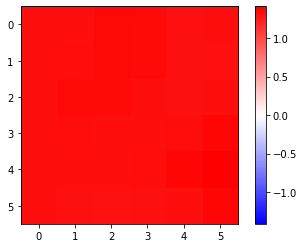

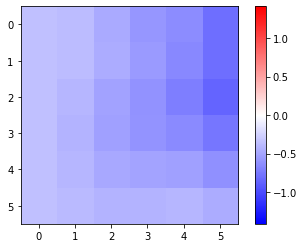

In [217]:
mx = np.maximum(np.max(np.abs(np.nanmean(dr_up,0))),np.max(np.abs(np.nanmean(dr_down,0))))
plt.figure()
ut.imshow_hot_cold(np.nanmean(dr_up,0),mx=mx)
plt.colorbar()
plt.figure()
ut.imshow_hot_cold(np.nanmean(dr_down,0),mx=mx)
plt.colorbar()

In [171]:
np.max(dr.flatten())/np.min(dr.flatten())

2.1796586135230056

In [172]:
np.max(dr_intrinsic.flatten())/np.min(dr_intrinsic.flatten())

1.6718681929343882

In [209]:
# nwt = 20
# YY_opto = YY_opto[:nwt]
# YY_ss = YY_ss[:nwt]

In [210]:
# ut.mkdir('../shared_data/calnet_data/dynamics/')
# np.save('../shared_data/calnet_data/dynamics/200724a.npy',YY_opto)
# YY_opto = np.load('../shared_data/calnet_data/dynamics/200724a.npy',allow_pickle=True)[()]

In [214]:
shp = YY_opto[0].shape
YY_opto_small = np.nan*np.ones((nwt,shp[0],shp[1],shp[3]))
tlast = 3000
for iwt in range(nwt):
    if not YY_opto[iwt] is None:
        YY_opto_small[iwt] = np.nanmean(YY_opto[iwt][:,:,-tlast:,:],2)
    

In [215]:
Niter = 1001

In [216]:
shp = YY_opto[0].shape
Niter = 101
YY_opto_medium = np.nan*np.ones((nwt,shp[0],shp[1],Niter,shp[3]))
for iwt in range(nwt):
    if not YY_opto[iwt] is None:
        YY_opto_medium[iwt] = YY_opto[iwt][:,:,::10,:]
        
# Niter = 1001
# YY_opto_medium = YY_opto.copy()
    

In [217]:
# del YY_opto

In [218]:
# np.save('YY_opto_medium_200921a.npy',YY_opto_medium)
# YY_opto_medium = np.load('YY_opto_medium_200921a.npy')[()]

In [457]:
YY_opto_medium.shape

(91, 17, 36, 101, 8)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


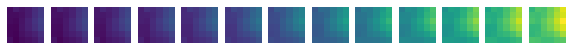

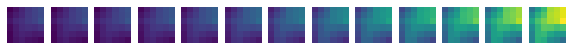

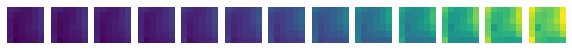

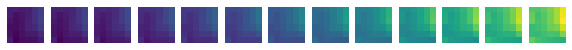

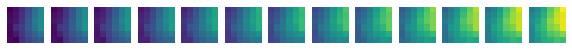

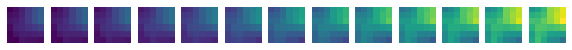

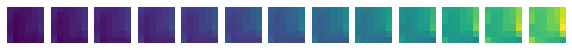

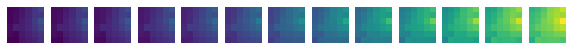

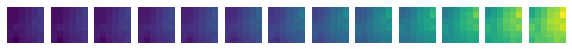

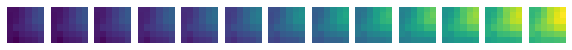

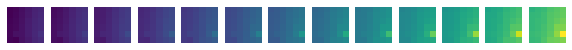

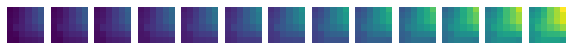

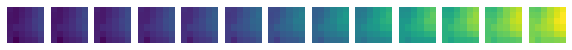

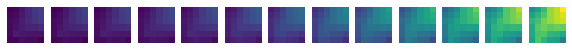

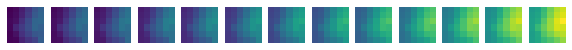

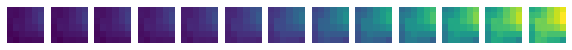

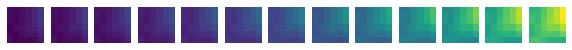

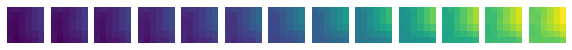

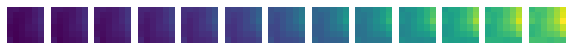

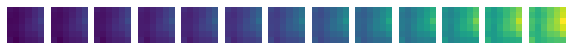

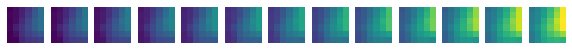

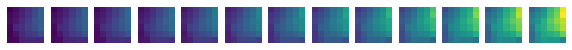

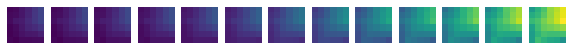

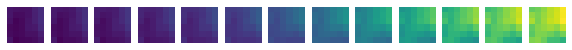

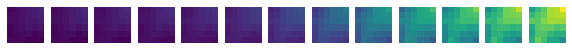

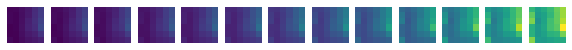

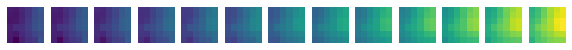

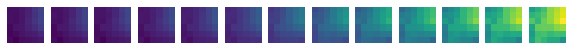

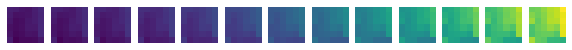

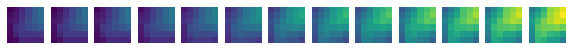

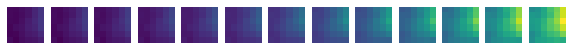

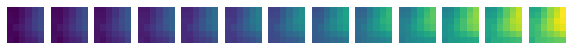

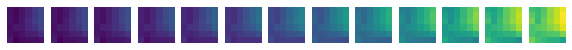

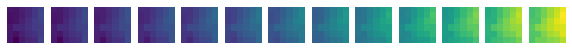

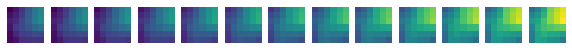

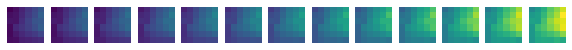

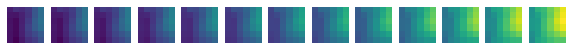

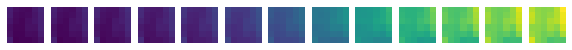

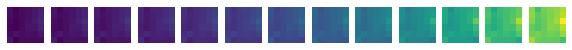

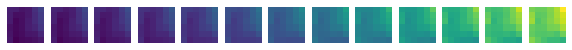

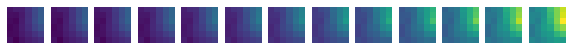

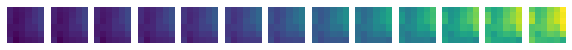

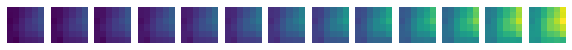

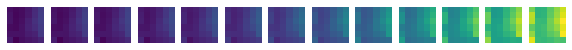

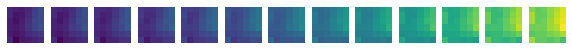

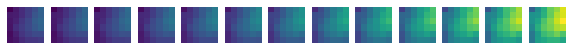

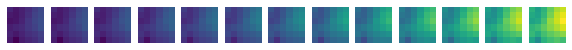

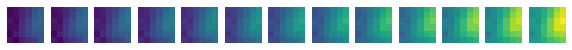

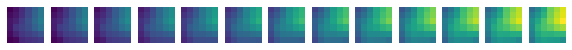

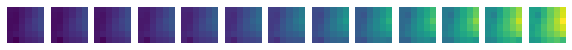

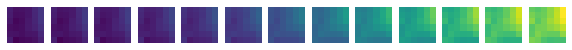

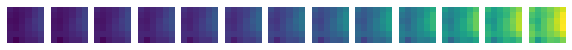

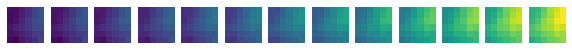

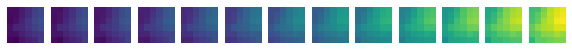

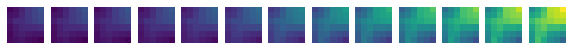

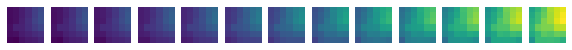

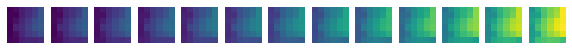

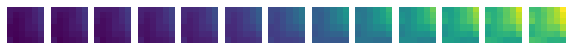

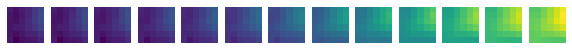

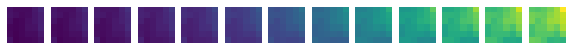

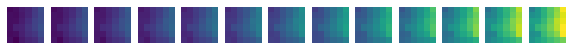

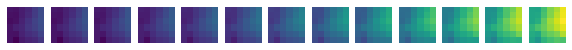

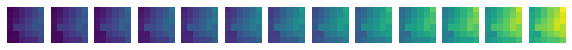

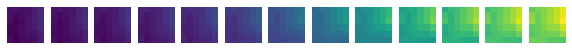

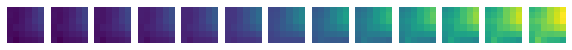

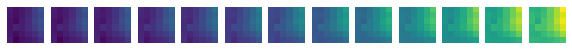

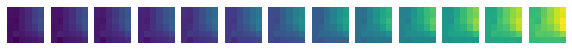

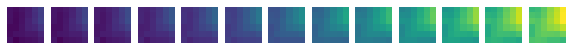

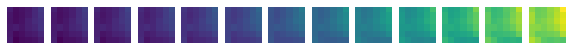

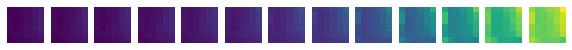

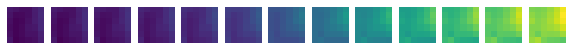

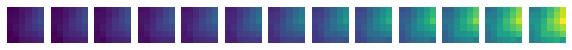

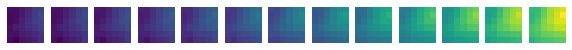

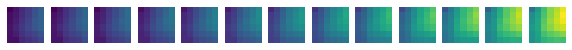

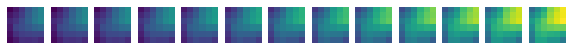

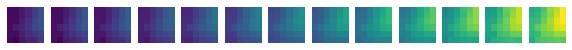

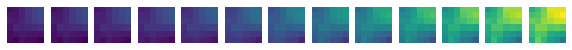

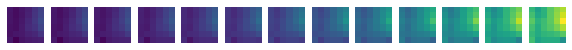

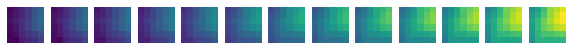

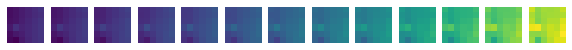

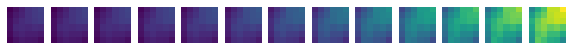

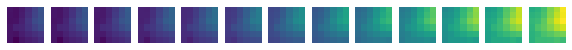

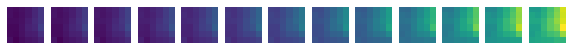

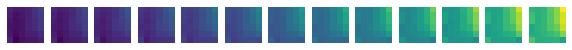

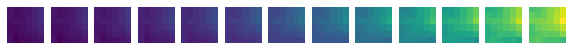

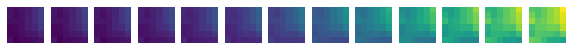

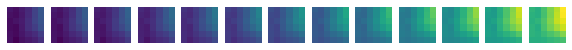

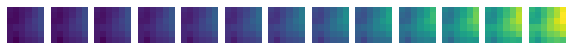

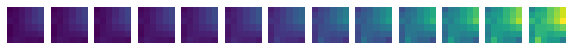

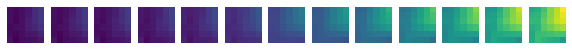

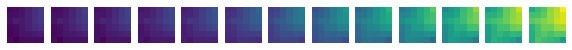

In [220]:
sc_opto = np.zeros((nwt,YY_opto_medium.shape[1],6,6))
for iwt in range(nwt):
    mag = 2
    for itype in range(1):
        plt.figure(figsize=(5*mag,mag))
        data = YY_opto_medium[iwt][:,:,:,itype].reshape((-1,6,6,Niter))
        data = np.nanmean(data[:,:,:,:],-1)
        slc = slice(2,-2)
        data = data[slc] #- data[5:6]
        sc_opto[iwt,slc] = data
        nopto = data.shape[0]
        for iopto in range(nopto):
            plt.subplot(1,nopto,iopto+1)
            plt.imshow(data[iopto],vmin=data.min(),vmax=data.max())
            plt.axis('off')

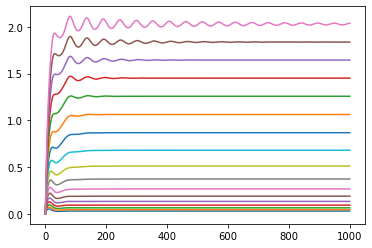

In [278]:
plt.figure()
plt.plot(YY_opto[0][:,18,:,2].T)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


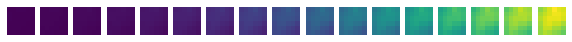

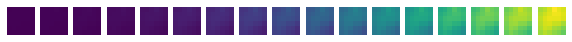

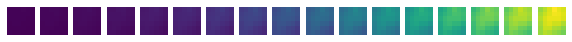

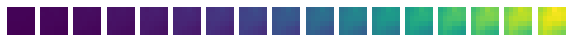

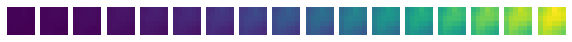

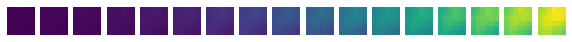

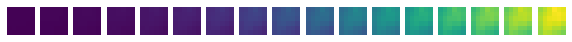

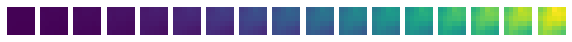

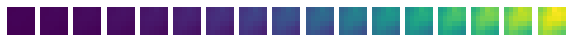

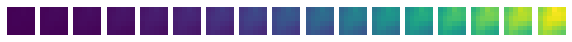

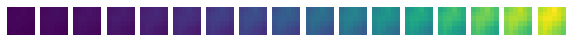

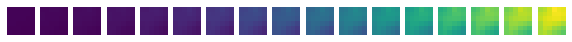

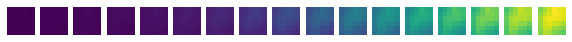

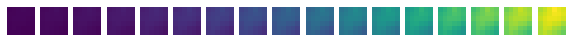

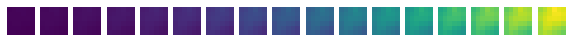

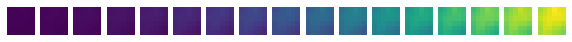

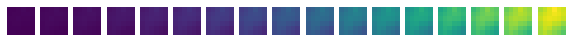

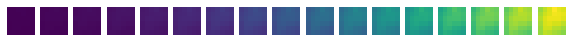

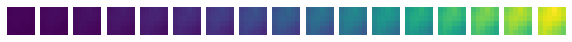

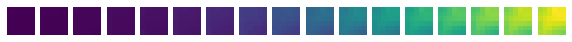

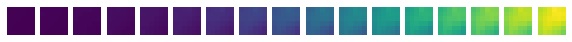

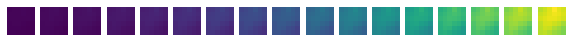

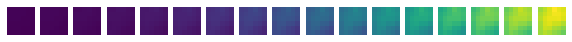

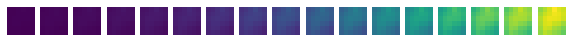

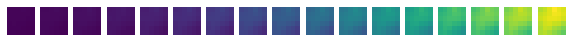

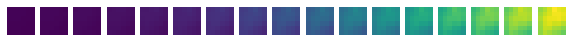

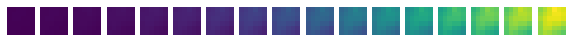

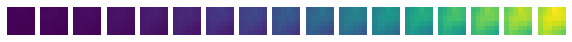

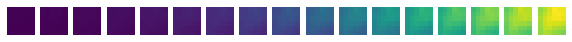

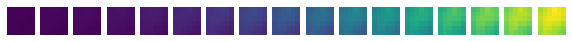

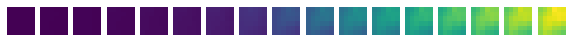

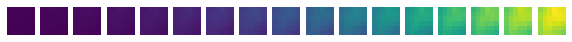

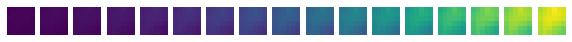

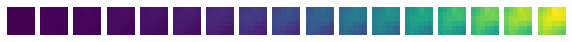

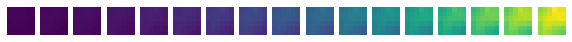

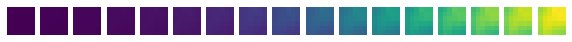

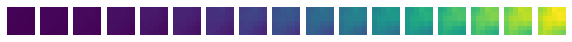

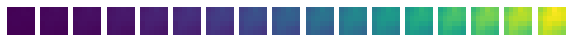

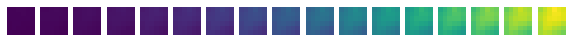

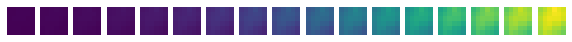

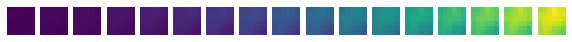

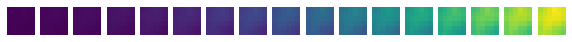

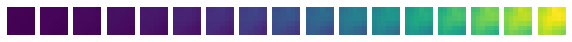

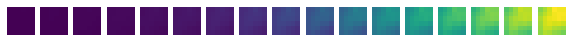

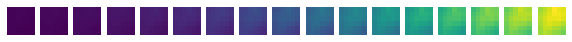

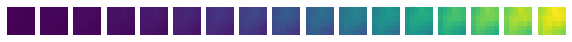

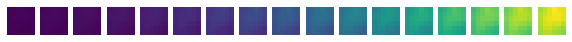

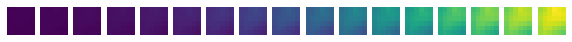

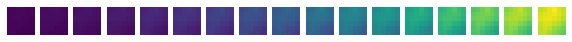

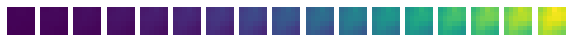

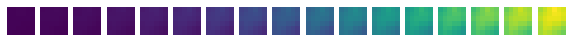

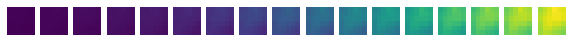

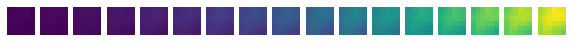

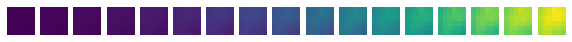

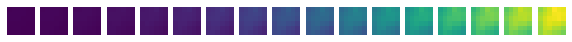

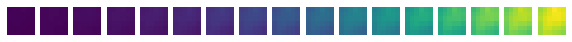

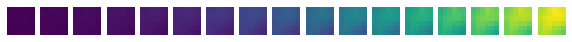

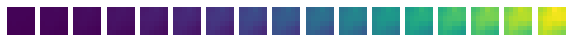

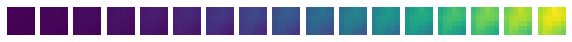

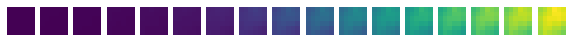

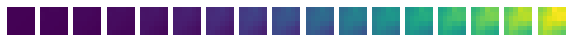

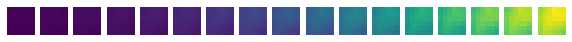

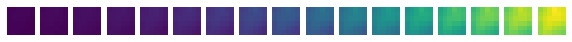

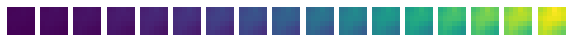

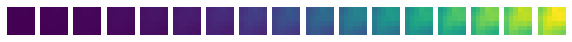

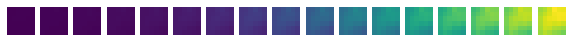

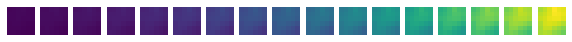

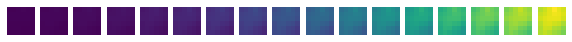

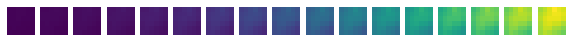

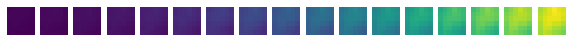

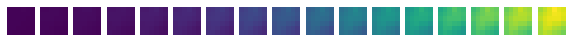

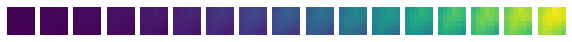

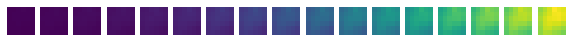

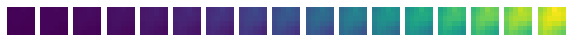

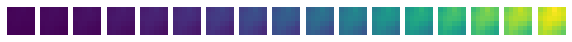

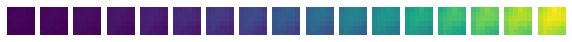

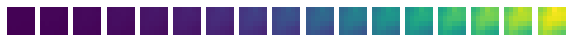

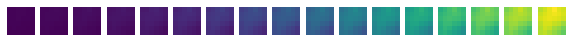

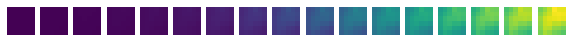

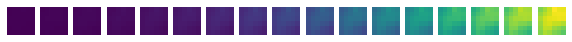

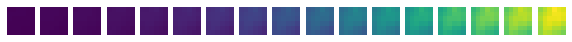

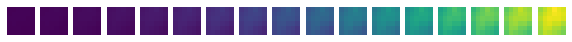

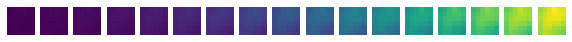

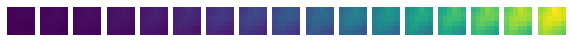

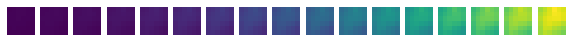

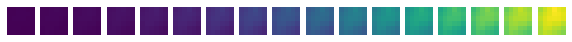

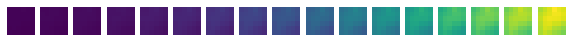

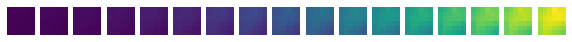

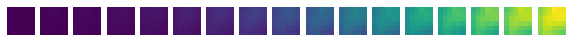

In [76]:
sc_opto = np.zeros((nwt,YY_opto_medium.shape[1],6,6))
for iwt in range(nwt):
    mag = 2
    for itype in range(2,3):
        plt.figure(figsize=(5*mag,mag))
        data = YY_opto_medium[iwt][:,:,:,itype].reshape((-1,6,6,Niter))
        data = np.nanmean(data[:,:,:,:],-1)
        data = data #- data[5:6]
        sc_opto[iwt] = data
        nopto = data.shape[0]
        for iopto in range(nopto):
            plt.subplot(1,nopto,iopto+1)
            plt.imshow(data[iopto],vmin=data.min(),vmax=data.max())
            plt.axis('off')

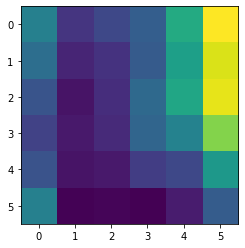

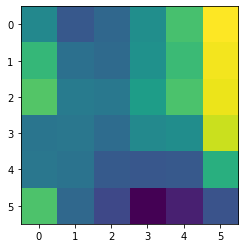

In [456]:
plt.figure()
plt.imshow(YY_opto_tavg[0,8,:,:,0])
plt.figure()
plt.imshow(YY_opto_tavg[0,16,:,:,0])

In [221]:
opto_levels[8]

0.0

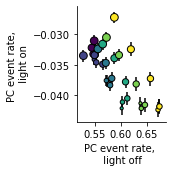

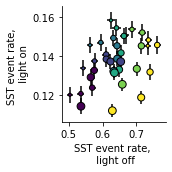

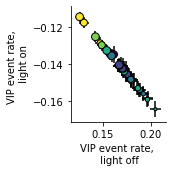

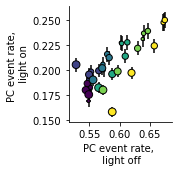

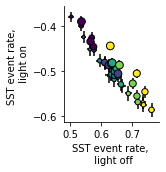

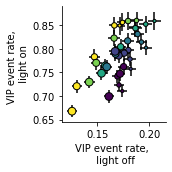

In [281]:
reload(ut)
reload(sca)
lbls = ['PC','SST','VIP','PV']
opto_lbls = ['halo','chrimson']
average_last = int(np.floor(Niter/5))
nopto = len(opto_levels)
ncelltypes = YY_opto_medium[0].shape[-1]
YY_opto_tavg = amps[:,np.newaxis,np.newaxis,np.newaxis,:]*np.nanmean(YY_opto_medium[:,:,:,-average_last:,:],3).reshape((nwt,nopto,6,6,ncelltypes)) + bltiles[:,np.newaxis,np.newaxis,np.newaxis,:]
# YY_opto_tavg = np.zeros((nwt,nopto,6,6,ncelltypes))
# for iwt in range(nwt):
#     YY_opto_tavg[iwt] = amps[iwt]*np.nanmean(YY_opto_medium[iwt][:,:,:,:],2).reshape((nopto,6,6,ncelltypes)) + bltiles[iwt]
iwt = -1
ilight1 = 5
for iilight2,ilight2 in enumerate([2,10]):
    for itype in range(3):
        plt.figure(figsize=(2.5,2.5))
        xdata = YY_opto_tavg[:,ilight1,:,:,itype]
        ydata = YY_opto_tavg[:,ilight2,:,:,itype]
        sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,mn=0,equality_line=False,square=False)
        ut.erase_top_right()
#         ut.zero_origin('xy')
        plt.xlabel('%s event rate, \n light off'%lbls[itype])
        plt.ylabel('%s event rate, \n light on'%lbls[itype])
        plt.tight_layout()
#         plt.savefig('figures/finite_%s_%s_scatter_light_on_light_off.eps'%(opto_lbls[iilight2],lbls[itype]))

In [17]:
fit_lbl = '201128b'
npyfile = np.load('../shared_data/calnet_data/dynamics/opto_tavg_%s.npy'%fit_lbl,allow_pickle=True)[()]
shp = npyfile['YY_opto'].shape
YY_opto_tavg = npyfile['YY_opto'].reshape(shp[:2]+(6,6)+shp[3:])
weights_files = glob.glob('../shared_data/calnet_data/weights/weights_%s/*.npy'%fit_lbl)
weights_files.sort()

In [232]:
npyfile['YY_opto'].shape

(372, 1, 36, 8)

In [623]:
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)

/Users/dan/Documents/code/adesnal/calnet/utils.py:631: RuntimeWarning: divide by zero encountered in true_divide
  u = mu/np.sqrt(2*s2)


In [15]:
opto_levels = np.linspace(-2,2,21)
nopto = opto_levels.size

In [18]:
import calnet.utils
import sim_utils
nfiles = len(weights_files)
# Ts = np.zeros((nfiles,nQ))
iwt = 0
nN,nP,nQ,nS,nT = mdls[iwt].nN,mdls[iwt].nP,mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
Ks = np.zeros((nfiles,nQ))
Wmys = np.zeros((nfiles,nQ,nQ))
Wmxs = np.zeros((nfiles,nP,nQ))
s02s = np.zeros((nfiles,nQ))
YYs = np.zeros((nfiles,6,6,nQ*nS*nT))
XXs = np.zeros((nfiles,6,6,nP*nS*nT))
Etas = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta1s = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta2s = np.zeros((nfiles,6,6,nQ*nS*nT))
h1s = np.zeros((nfiles,))
h2s = np.zeros((nfiles,))
losses = np.zeros((nfiles,))
couplings = np.zeros((nfiles,nopto,6,6,nQ*nS*nT,nQ*nS*nT))
phis = np.zeros((nfiles,nopto,6,6,nQ*nS*nT))
for iwt,weights_file in enumerate(weights_files):
    Wstar_dict = np.load(weights_file,allow_pickle=True)[()]
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h = Wstar_dict['as_list']
    try:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl = Wstar_dict['as_list']
        amp = np.ones((nQ*nS*nT,))
    except:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl,amp = Wstar_dict['as_list']
    losses[iwt] = Wstar_dict['loss']
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,h3,Eta1,Eta2,Eta3 = Wstar_dict['as_list']
    WWmy = calnet.utils.gen_Weight_k_kappa_t(Wmy,K,kappa,T,nS=nS,nT=nT)
    WWmx = calnet.utils.gen_Weight_k_kappa_t(Wmx,K,kappa,T,nS=nS,nT=nT)
    tiled_s02 = np.tile(s02,nS*nT)
#     Ts[iwt] = T
    Ks[iwt] = K
    Wmys[iwt] = Wmy
    Wmxs[iwt] = Wmx
    s02s[iwt] = s02
    YY0 = sim_utils.f_miller_troyer(Eta,Xi**2+tiled_s02)
    YYs[iwt] = amp*YY0.reshape((6,6,nQ*nS*nT)) + np.tile(bl,nS*nT)[np.newaxis]
    XXs[iwt] = XX.reshape((6,6,nP*nS*nT))
    Etas[iwt] = Eta.reshape((6,6,nQ*nS*nT))
    h1s[iwt] = h1
    h2s[iwt] = h2
    bltile = np.tile(bl,nS*nT)
    for ilight in range(YY_opto_tavg.shape[1]):
        this_YY = 1/amp[np.newaxis,:]*(YY_opto_tavg[iwt,ilight].reshape((nN,nQ*nS*nT)) - bltile[np.newaxis,:])
#         this_YY = YY_opto_tavg[iwt,ilight].reshape((nN,nQ*nS*nT))
        phis[iwt,ilight] = mdls[iwt].fprimeXY(mdls[iwt].XX,this_YY).reshape((6,6,nQ*nS*nT))
    for istim in range(nN):
        iistim,jjstim = np.unravel_index(istim,(6,6))
#         phis[iwt,iistim,jjstim] = calnet.utils.fprime_miller_troyer(Eta[istim],Xi[istim]**2+tiled_s02)
        for ilight in range(nopto):
            Phi = np.diag(phis[iwt,ilight,iistim,jjstim])
            couplings[iwt,ilight,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)

IndexError: list index out of range

In [5]:
plt.close('all')

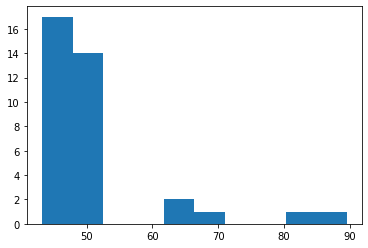

In [626]:
plt.figure()
plt.hist(losses[losses<100])
low_loss = (losses<60)

In [640]:
ilight_halo = 8
ilight_chrimson = 16
ilight_off = 10

In [628]:
# top_smimi = np.array([73])
# top_smimi = np.array([79, 60, 73])
# top_smimi = np.array([34, 60, 73, 78, 79])
# top_smimi = np.array([ 5, 19, 34, 60, 73, 78, 79, 87, 88])

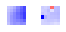

In [629]:
reload(ut)
plt.figure()
for iwt in range(nwt):
    if iwt in top_smimi:
        plt.subplot(10,10,iwt+1)
        mx = np.max(np.abs(couplings[iwt,:,:,:,4,0]))
        ut.imshow_hot_cold(couplings[iwt,ilight_off,:,:,4,0],mx=mx)
        plt.axis('off')
# plt.colorbar()

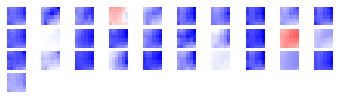

In [630]:
plt.figure()
for iwt in range(np.minimum(low_loss.sum(),100)):
    plt.subplot(10,10,iwt+1)
    mx = np.max(np.abs(couplings[low_loss][iwt,:,:,:,4,0]))
    ut.imshow_hot_cold(couplings[low_loss][iwt,ilight_off,:,:,4,0],mx=mx)
    plt.axis('off')
# plt.colorbar()

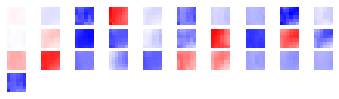

In [631]:
plt.figure()
for iwt in range(np.minimum(low_loss.sum(),100)):
    plt.subplot(10,10,iwt+1)
    mx = np.max(np.abs(couplings[low_loss][iwt,:,:,:,4,0]))
    ut.imshow_hot_cold(couplings[low_loss][iwt,ilight_chrimson,:,:,4,0],mx=mx)
    plt.axis('off')
# plt.colorbar()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


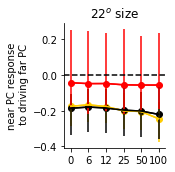

In [642]:
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
ucontrast = np.array((0,6,12,25,50,100))
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_pct_errorbars_hillel(np.arange(6),couplings[low_loss][:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j],pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving far PC')
plt.title('22$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
# plt.savefig('figures/far_pc_near_pc_coupling_sim_vip_opto.eps')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


1.1831634290806285


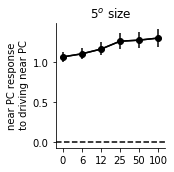

In [633]:
i,j = 0,0
plt.figure(figsize=(2.5,2.5))
ucontrast = np.array((0,6,12,25,50,100))
isize = 0
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),couplings[low_loss][:,[ilight_off]][:,:,isize,:,i,j],pct=(16,84),colors=colors[1:2])
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving near PC')
plt.title('5$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
# plt.savefig('figures/near_pc_near_pc_coupling_sim_vip_opto.eps')


In [581]:
couplings[low_loss].shape

(98, 21, 6, 6, 8, 8)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.20622052119347872


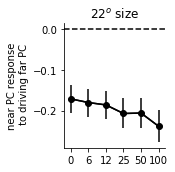

In [634]:
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),couplings[low_loss][:,[ilight_off]][:,:,isize,:,i,j],pct=(16,84),colors=colors[1:2])
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving far PC')
plt.title('22$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
# plt.savefig('figures/far_pc_near_pc_coupling.eps')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.15686076394847015
-0.06485143995261829
-0.23941055773302272
-0.0970268442658368
-0.1398307765534857
-0.22285440024273326
-0.0807831188927623
-0.03524772401727159
-0.1677246191453393
0.050540825177381545
-0.09846154187861657
-0.053330986985718885
-0.003209762287898407
-0.3198329650658203
0.01997753589636093
-0.6359062603643807
-0.09785244078721457
-0.04817591029452165
0.05914192424912602
-0.06683658788530175
-0.1051628871963274
-0.029867350563647383
-0.10271619456271863


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.02104895842887898
-0.015442709572586751
-0.11277011231740752
-0.2683044311543184
-0.1924891115133093
-0.33504746016679254
-0.021229543714734074
-0.5796198347778655
0.09726862814583315
-0.06582738479698524
-0.2210283139932979
0.18198370948548617
-0.023822803663981727
0.07766479647049873
-0.21378065618430275
-0.19268029326935704
-0.07232740607313397
-0.10469921859831188
-0.16925885088094508
0.00921086276951182
-0.13622726488229583
-0.04326792255198699
-0.043910514340962


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.12772429270120492
-0.15235135377410855
0.031023277970719427
-0.04992257791262692
-0.13702368721899524
-0.10040149420938796
-0.07630996453907814
-0.024216329145626495
0.191060262267765
-0.056620544059469174
-0.11359046744725676
-0.02706170005689708
0.1772091354640672
-0.06877689445394658
-0.3030368161252847
-0.13409381679941437
-0.24676708278009124
-0.46421380270884915
-0.03503494844743627
-0.06431674480713379
-0.013076962002493907


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.25268920595377187
-0.24769714406915813
-0.14896839615539245
-0.21631822990373098
-0.1276934031273173
-0.069213294198642
-0.034098434933428845
-0.0086861928938928
-0.1912724377457756
-0.1492595033056872
-0.03011830464572059
-0.17454410911039686
-0.029923672585640795
-0.4957061160521352
-0.09541669733339846
-0.0031537140330252095
-0.19986874568843305
-0.15545325886678807
-0.40301161967082105
-0.14334475270933597
-0.18718655928968025


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.1904343144720196
-0.048237230409027415
-0.25572277816331584
-0.04126779196466589
-0.019929422986151694
-0.061888036981486115
-0.2577492269454373
-0.11560517512905598
-0.035485903279076386
-0.2968627435835294
-0.02727418499882983
0.03820843827298045
0.26418963883928254
-0.14832872979725745
-0.1609920800013049
-0.004028882580729394
-0.12032452707602621
-0.21977023406357005
-0.1102426679418318
-0.06248168011946387
-0.25835031626088834


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.01805488190473575
-0.08217368411482574
-0.21944662029576878
-0.02355106895592442
-0.05979450150283373
-0.25628105944175233
0.09128376202443024
-0.012441661369459265
0.16233603616726108
-0.028153178321032445
-0.10872981242640808
-0.06876581619432805
-0.34193402045983345
-0.01344957569806804
-0.015970690271152593
-0.1372401596275143
0.029526007893609665
-0.08402386092054176
-0.06947866587213487
-0.07433156152119905


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.046803690848202975
-0.04599324365419949
0.02734454742578013
0.9168151219417909


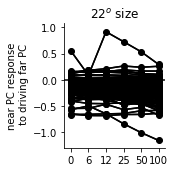

In [583]:
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
for iwt in range(couplings.shape[0]):
    ut.plot_bootstrapped_errorbars_hillel(np.arange(6),couplings[iwt:iwt+1,[ilight_off]][:,:,isize,:,i,j],pct=(16,84),colors=colors[1:2])
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving far PC')
plt.title('22$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
# plt.savefig('figures/far_pc_near_pc_coupling.eps')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


2.6280033096800004


Text(0.5, 1.0, '22$^o$ size')

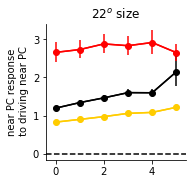

In [635]:
i,j = 0,0
plt.figure(figsize=(2.5,2.5))
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j],pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving near PC')
plt.title('22$^o$ size')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


4.006681161509711


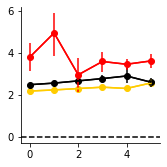

In [616]:
i,j = 0,0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
this_data = couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j]/phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i]
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),this_data,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.8638361763516298


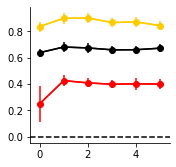

In [446]:
i,j = 2,0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
this_data = couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j]/phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i]/phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,j]
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),this_data,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.21165343296713277


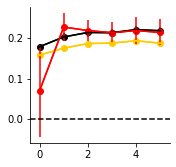

In [447]:
i,j = 2,0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
this_data = couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j]
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),this_data,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


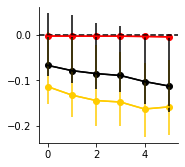

In [448]:
i,j = 1,0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
this_data = couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j]
ut.plot_pct_errorbars_hillel(np.arange(6),this_data,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.770586616984359


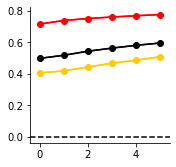

In [449]:
i = 0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i],pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.6635194814302638


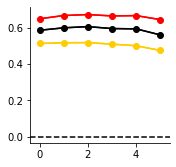

In [450]:
i = 2
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i],pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

ValueError: num must be 1 <= num <= 100, not 101

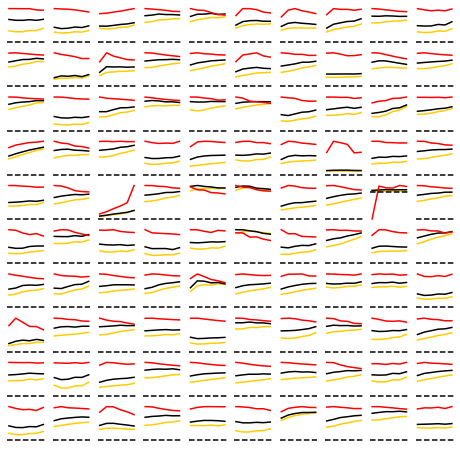

In [451]:
i,j = 0,0
plt.figure(figsize=(8,8))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    for iilight,ilight in enumerate([ilight_halo,ilight_off,ilight_chrimson]):
        plt.plot(np.arange(6),couplings[iwt,ilight,isize,:,i,j],c=colors[iilight])
    ut.erase_top_right()
    plt.axhline(c='k',linestyle='dashed')
    plt.axis('off')

ValueError: num must be 1 <= num <= 100, not 101

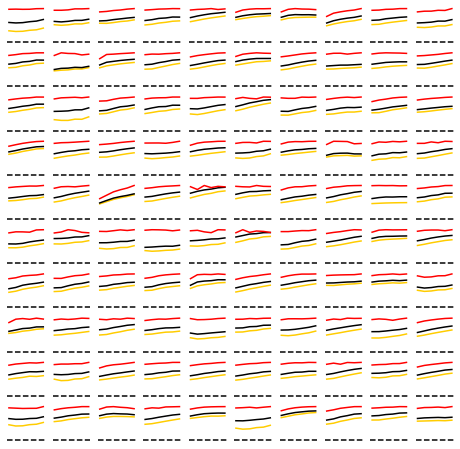

In [452]:
i = 0
plt.figure(figsize=(8,8))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    for iilight,ilight in enumerate([ilight_halo,ilight_off,ilight_chrimson]):
        plt.plot(np.arange(6),phis[iwt,ilight,isize,:,i],c=colors[iilight])
    ut.erase_top_right()
    plt.axhline(c='k',linestyle='dashed')
    plt.axis('off')

In [ ]:
YY_opto_medium.shape

In [617]:
reload(ut)
reload(sca)
average_last = int(np.floor(Niter/5))
lbls = ['PC','SST','VIP','PV']
opto_lbls = ['halo','chrimson']
nopto = len(opto_levels)
ncelltypes = YY_opto_medium[0].shape[-1]
YY_opto_tavg = np.zeros((nwt,nopto,6,6,ncelltypes))
for iwt in range(nwt):
    YY_opto_tavg[iwt] = np.nanmean(YY_opto_medium[iwt][:,:,-average_last:,:],2).reshape((nopto,6,6,ncelltypes))
iwt = -1
ilight1 = 5
for iilight2,ilight2 in enumerate([2,6]):
    for itype in range(3):
        plt.figure(figsize=(12,2))
        for iwt in range(6):#nwt):
            plt.subplot(1,6,iwt+1)
            xdata = YY_opto_tavg[iwt,ilight1,:,:,itype]
            ydata = YY_opto_tavg[iwt,ilight2,:,:,itype]
            sca.scatter_size_contrast(xdata,ydata,mn=0)
            ut.erase_top_right()
#         ut.zero_origin('xy')
            plt.xlabel('%s event rate, \n light off'%lbls[itype])
            plt.ylabel('%s event rate, \n light on'%lbls[itype])
        plt.tight_layout()
#         plt.savefig('figures/finite_%s_%s_scatter_light_on_light_off.eps'%(opto_lbls[iilight2],lbls[itype]))

ValueError: cannot reshape array of size 4896 into shape (21,6,6,8)

In [638]:
YY_opto_tavg.shape

(134, 21, 6, 6, 8)

In [639]:
np.save('../shared_data/opto_sim_data.npy',{'YY_opto':YY_opto_tavg[low_loss]})

(array([ 1.,  1.,  1.,  1.,  2.,  4., 12., 27., 25., 15.]),
 array([-0.09185796, -0.05309753, -0.0143371 ,  0.02442333,  0.06318376,
         0.10194419,  0.14070462,  0.17946505,  0.21822547,  0.2569859 ,
         0.29574633]),
 <a list of 10 Patch objects>)

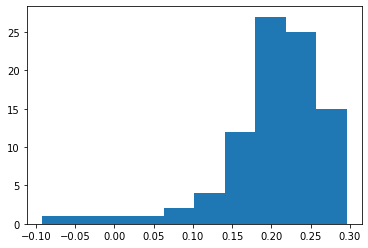

In [50]:
plt.figure()
plt.hist(bltiles[:,0])

True

(11, 36, 101, 8)

In [ ]:
plt.figure()
sca.scatter_size_contrast(YY_opto_medium[-1][:,:,:,])

In [48]:
usize = np.array([5,8,13,22,36,60])
ucontrast = np.array([0,6,12,25,50,100])

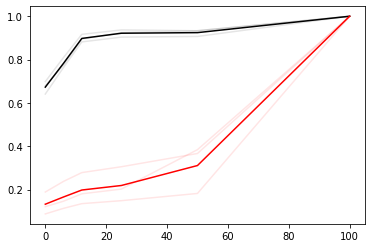

In [49]:
ilights = [5,10]
colors = ['k','r']
isize = -1
plt.figure()
for ilight,color in zip(ilights,colors):
    data = np.nanmean(YY_opto_medium[:,ilight,:,:,0],2).reshape((-1,6,6))
    this_data = data[:,isize,:]/data[:,isize,:].max(1)[:,np.newaxis]
    plt.plot(ucontrast,this_data.T,c=color,alpha=0.1)
    plt.plot(ucontrast,np.mean(this_data,0),c=color)

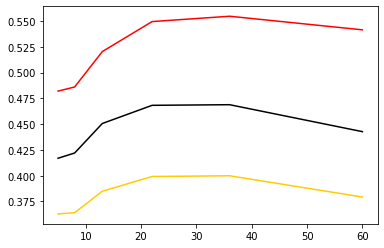

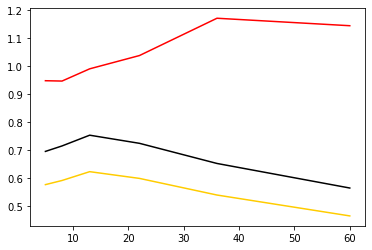

In [37]:
ilights = [1,5,9]
colors = [np.array((1,0.8,0)),'k','r']
nlights = len(ilights)
smi = np.zeros((YY_opto_medium.shape[0],nlights,6))
itype = 0
for iilight,ilight in enumerate(ilights):
    data = np.nanmean(YY_opto_medium[:,ilight,:,:,itype],2).reshape((-1,6,6))
    smi[:,iilight] = data[:,-1,:]/np.max(data,axis=1)
    
for icontrast in [1,5]:
    plt.figure()
    for ilight,color in zip(ilights,colors):
        data = np.nanmean(YY_opto_medium[:,ilight,:,:,itype],2).reshape((-1,6,6))
        this_data = data[:,:,icontrast]#/data[:,:,icontrast].max(1)[:,np.newaxis]
#         plt.plot(usize,this_data.T,c=color,alpha=0.1)
        plt.plot(usize,np.mean(this_data,0),c=color)

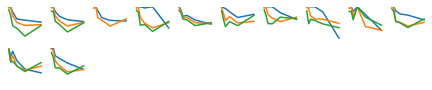

In [16]:
plt.figure(figsize=(7.5,7.5))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    plt.plot(ucontrast,smi[iwt,:,:].T)
    plt.ylim((0.5,1))
    plt.axis('off')

In [17]:
plt.figure()
plt.plot(ucontrast,smi[68].T)

IndexError: index 68 is out of bounds for axis 0 with size 12

<Figure size 432x288 with 0 Axes>

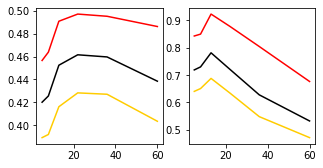

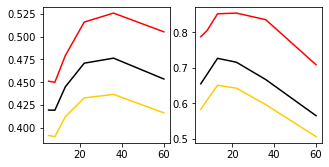

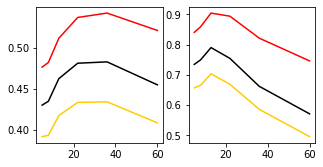

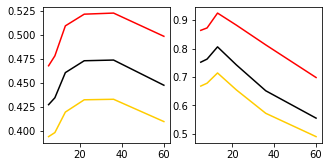

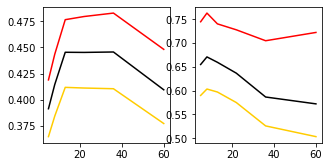

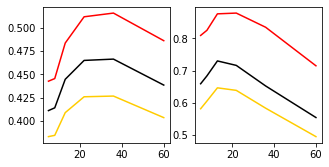

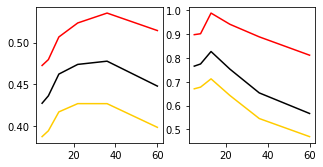

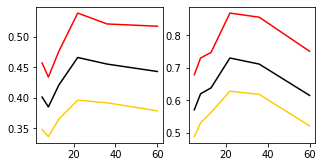

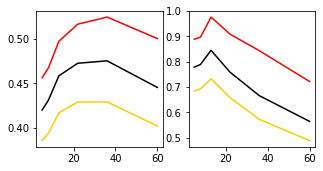

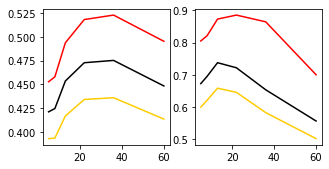

In [38]:
for iwt in range(nwt):
    ilights = [3,5,7]
    colors = [np.array((1,0.8,0)),'k','r']
    nlights = len(ilights)

    plt.figure(figsize=(5,2.5))
    for iicontrast,icontrast in enumerate([1,5]):
        plt.subplot(1,2,iicontrast+1)
        for ilight,color in zip(ilights,colors):
            data = np.nanmean(YY_opto_medium[iwt,ilight,:,:,itype],1).reshape((-1,6,6))
            this_data = data[:,:,icontrast]#/data[:,:,icontrast].max(1)[:,np.newaxis]
    #         plt.plot(usize,this_data.T,c=color,alpha=0.1)
            plt.plot(usize,np.nanmean(this_data,0),c=color)

In [43]:
np.nanmean(YY_opto_medium[:,:,:,:,itype],3).reshape((nwt,-1,6,6))[:,:,[0,2,3,5],:].shape

(10, 11, 4, 6)

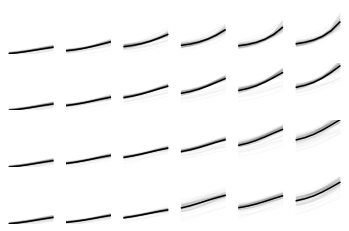

In [67]:
data = np.nanmean(YY_opto_medium[:,2:8,:,:,itype],3).reshape((nwt,-1,6,6))[:,:,[0,2,3,5],:]
nsize,ncontrast = 4,6
mn = np.nanmean(data,0).min()
mx = np.nanmean(data,0).max()
plt.figure()
for isize in range(nsize):
    for icontrast in range(ncontrast):
        plt.subplot(nsize,ncontrast,(nsize-isize-1)*ncontrast+icontrast+1)
        plt.plot(data[:,:,isize,icontrast].T,c='k',alpha=0.02)
        plt.plot(np.nanmean(data[:,:,isize,icontrast],0),c='k')
        plt.ylim((mn,mx))
        plt.axis('off')
plt.savefig('figures/vip_sim_master_plot.jpg',dpi=300)

In [177]:
YY_opto_medium[0,7,:,:,itype]

array([[0.49249911, 0.49249911, 0.49249911, ..., 0.49249911, 0.49249911,
        0.49249911],
       [0.54827048, 0.54827048, 0.54827048, ..., 0.54827048, 0.54827048,
        0.54827048],
       [0.60918797, 0.60918797, 0.60918797, ..., 0.60918797, 0.60918797,
        0.60918797],
       ...,
       [0.7447089 , 0.7447089 , 0.7447089 , ..., 0.7447089 , 0.7447089 ,
        0.7447089 ],
       [0.73623515, 0.73623515, 0.73623515, ..., 0.73623515, 0.73623515,
        0.73623515],
       [0.75386399, 0.75386399, 0.75386399, ..., 0.75386399, 0.75386399,
        0.75386399]])

In [143]:
# for iwt in range(nwt):
#     plt.figure()
#     for ilight,isize,icontrast in zip([0,5,10],[4,4,4],[5,5,5]):
#         tmax = Niter
#         t = np.arange(tmax)*dt
#         iflat = np.ravel_multi_index((isize,icontrast),(nsize,ncontrast))
#         plt.plot(t,YY_opto[iwt][ilight,iflat,:tmax,0].T)

In [168]:
np.nanmax(data)

0.0

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


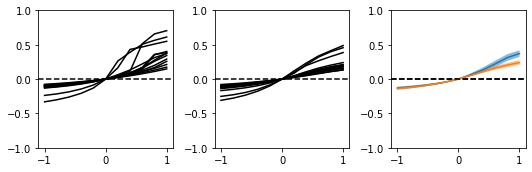

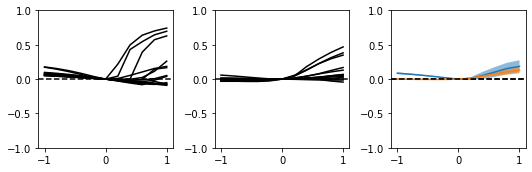

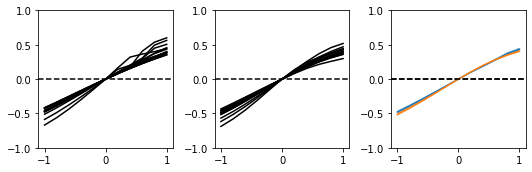

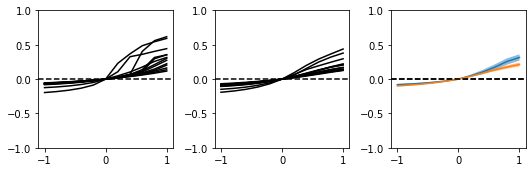

In [234]:
iwt = 0
data = np.zeros((nwt,YY_opto_medium[0].shape[0],6,6))
these_lvls = slice(None)
for itype in [0,1,2,3]:
    plt.figure(figsize=(7.5,2.5))
    isize = 3
    tlast = 1000
    icontrasts = [1,5]
    for iwt in range(nwt):
        data[iwt] = np.nanmean(YY_opto_medium[iwt][:,:,:,itype],2).reshape((-1,6,6)) # light, stim, time, type
        data[iwt] = (data[iwt] - data[iwt,5])/(data[iwt] + data[iwt,5])
    for iicontrast,icontrast in enumerate(icontrasts):
        this_data = data[:,:,isize,icontrast]
        plt.subplot(1,3,iicontrast+1)
        for iwt in range(nwt):
            plt.plot(opto_levels[these_lvls],this_data[iwt][these_lvls],c='k',alpha=1)
        plt.plot(opto_levels[these_lvls],np.mean(this_data,0)[these_lvls],c='k')
        plt.ylim((np.nanmin(data[:,:,isize,icontrasts]),np.nanmax(data[:,:,isize,icontrasts])))
        plt.axhline(0,c='k',linestyle='dashed')
        plt.ylim(-1,1)
        plt.subplot(1,3,3)
        mn = np.mean(this_data,0)[these_lvls]
        sem = np.std(this_data,0)[these_lvls]/np.sqrt(this_data.shape[0])
        plt.plot(opto_levels[these_lvls],mn)
        plt.fill_between(opto_levels[these_lvls],mn-sem,mn+sem,alpha=0.5)
        plt.ylim((np.nanmin(data[:,:,isize,icontrasts]),np.nanmax(data[:,:,isize,icontrasts])))
        plt.axhline(0,c='k',linestyle='dashed')
        plt.ylim(-1,1)
    plt.tight_layout()

In [136]:
non_paradoxical = (YY_opto_small[:,10,:,1] - YY_opto_small[:,5,:,1]>0).sum(1) == 0

In [ ]:
iwt,ilight = 0,-1
thisYY = np.nanmean(YY_opto[iwt,:,:,:],2)
mdls[0].fprimeY(thisYY).shap

In [160]:
YY_opto.shape

(10, 11, 36, 10001, 16)

In [162]:
this_fprime = mdls[0].fprimeY(np.nanmean(YY_opto[iwt],2))
this_fprime.shape

(11, 36, 16)

In [84]:
nlight = YY_opto_medium.shape[1]
nN,nP,nQ,nS,nT = [getattr(mdls[0],x) for x in ['nN','nP','nQ','nS','nT']]
phis = np.zeros((nwt,nlight,6,6,nQ*nS*nT))
couplings = np.zeros((nwt,nlight,6,6,nQ*nS*nT,nQ*nS*nT))
Xcouplings = np.zeros((nwt,nlight,6,6,nP*nS*nT,nQ*nS*nT))
for iwt,mdl in enumerate(mdls[:nwt]):
    print('model #%d'%iwt)
    this_fprime = mdl.fprimeY(np.nanmean(YY_opto_medium[iwt],2))
    WWmx,WWmy = [getattr(mdls[iwt],x) for x in ['WWmx','WWmy']]
    for ilight in range(nlight):
        for istim in range(nN):
            iistim,jjstim = np.unravel_index(istim,(6,6))
            phis[iwt,ilight,iistim,jjstim] = this_fprime[ilight,istim]
            Phi = np.diag(phis[iwt,ilight,iistim,jjstim])
            couplings[iwt,ilight,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
            Xcouplings[iwt,ilight,iistim,jjstim] = WWmx @ Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
# couplings = np.reshape(couplings,(couplings.shape[0],6,6,couplings.shape[2],couplings.shape[3]))
# Xcouplings = np.reshape(Xcouplings,(Xcouplings.shape[0],6,6,Xcouplings.shape[2],Xcouplings.shape[3]))


model #0
model #1
model #2
model #3
model #4
model #5
model #6
model #7
model #8
model #9
model #10
model #11
model #12
model #13
model #14
model #15
model #16
model #17
model #18
model #19
model #20
model #21
model #22
model #23
model #24
model #25
model #26
model #27
model #28
model #29
model #30
model #31
model #32
model #33
model #34
model #35
model #36
model #37
model #38
model #39
model #40
model #41
model #42
model #43
model #44
model #45
model #46
model #47
model #48
model #49
model #50
model #51
model #52
model #53
model #54
model #55
model #56
model #57
model #58
model #59
model #60
model #61
model #62
model #63
model #64
model #65
model #66
model #67
model #68
model #69
model #70
model #71
model #72
model #73
model #74
model #75
model #76
model #77
model #78
model #79
model #80
model #81
model #82
model #83
model #84
model #85
model #86
model #87
model #88
model #89
model #90
model #91
model #92
model #93
model #94
model #95
model #96
model #97
model #98
model #99
model #100

In [85]:
lbls = ['PC','SST','VIP','PV']

In [86]:
iwt = 1

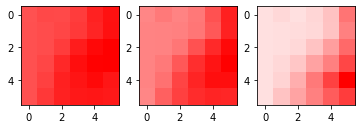

In [87]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[iwt,5*ilight,:,:,1,1]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

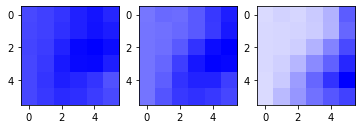

In [88]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[iwt,5*ilight,:,:,2,1]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

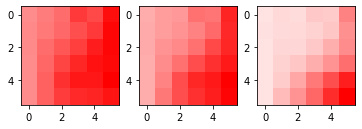

In [89]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[iwt,5*ilight,:,:,2,0]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

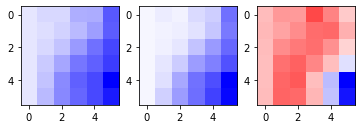

In [104]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[1,5*ilight,:,:,8,0]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


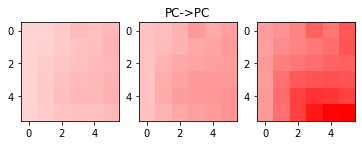

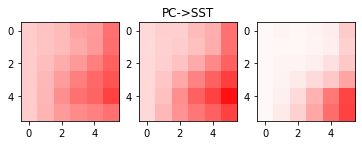

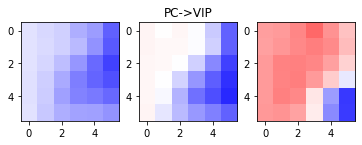

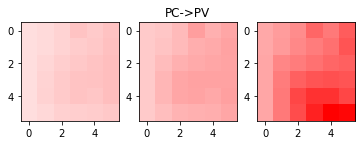

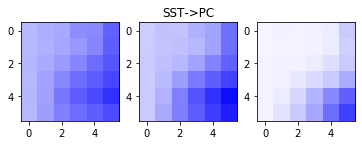

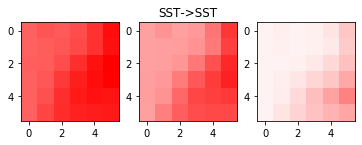

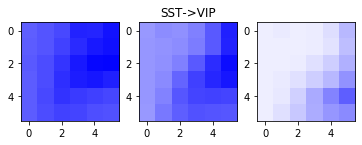

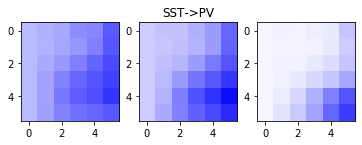

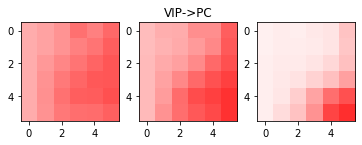

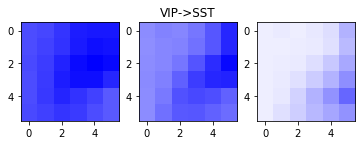

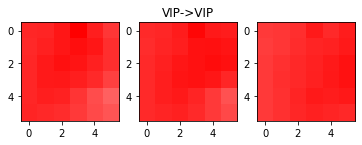

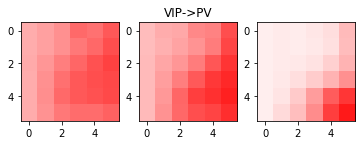

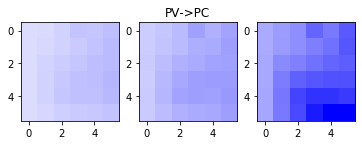

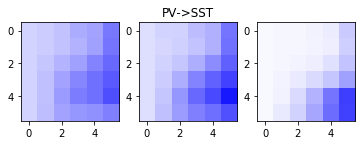

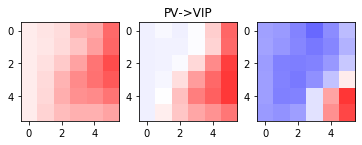

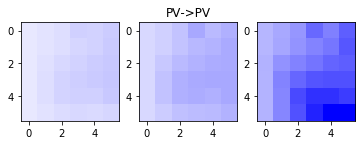

In [93]:
for itype1 in range(nQ):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(couplings[:,:,:,:,itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5*ilight]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('%s->%s'%(lbls[itype1],lbls[itype2]))

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


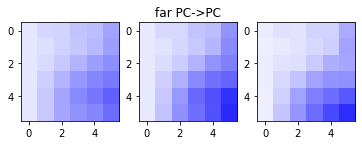

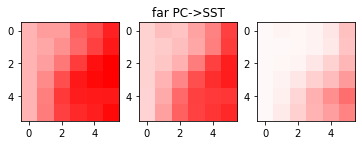

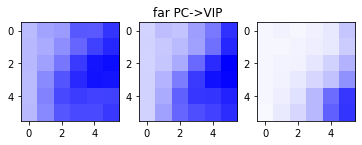

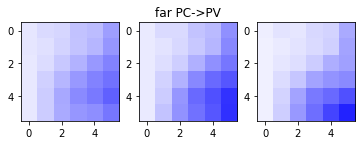

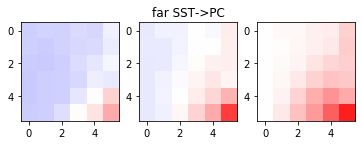

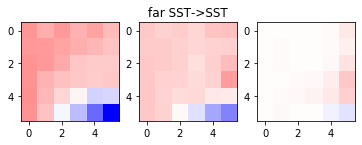

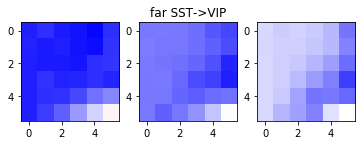

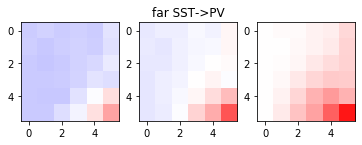

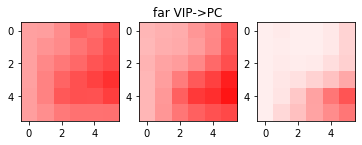

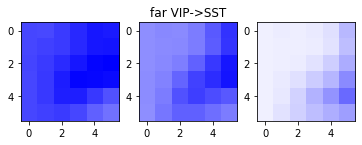

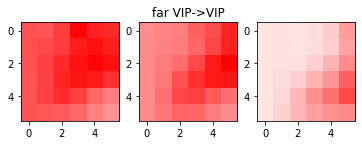

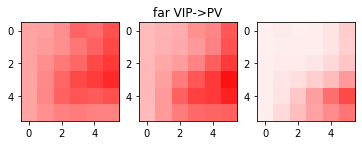

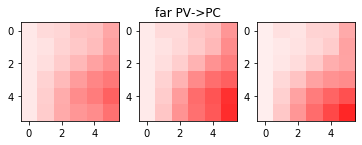

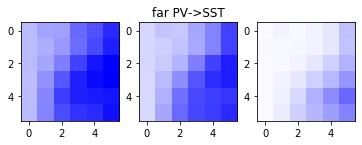

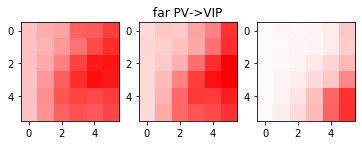

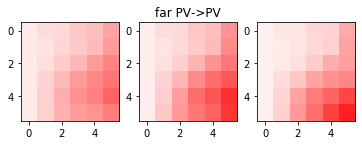

In [97]:
for itype1 in range(nQ):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(couplings[:,:,:,:,8+itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5*ilight]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('far %s->%s'%(lbls[itype1],lbls[itype2]))

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


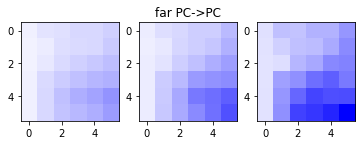

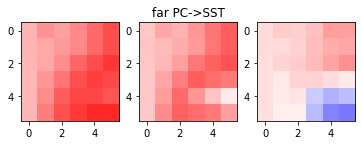

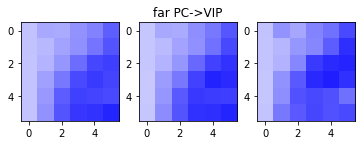

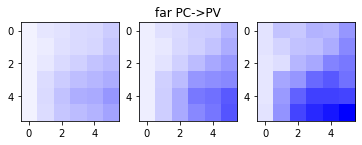

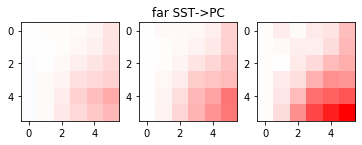

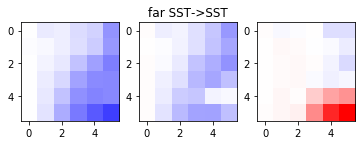

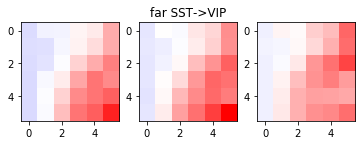

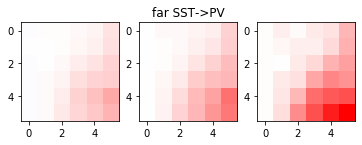

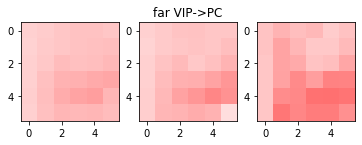

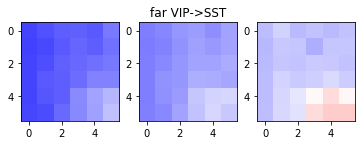

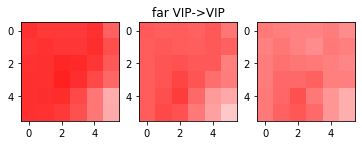

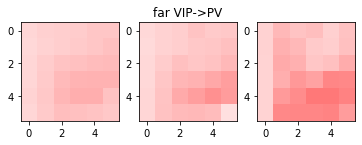

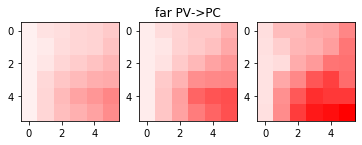

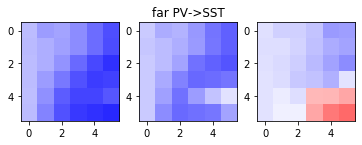

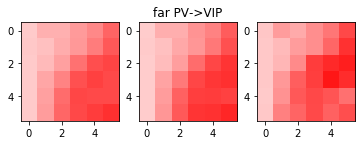

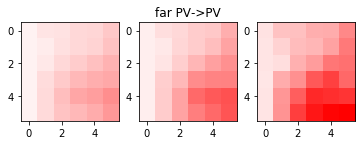

In [133]:
for itype1 in range(nQ):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(couplings[:,:,:,:,8+itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5+2*(ilight-1)]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('far %s->%s'%(lbls[itype1],lbls[itype2]))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.29041152623994315


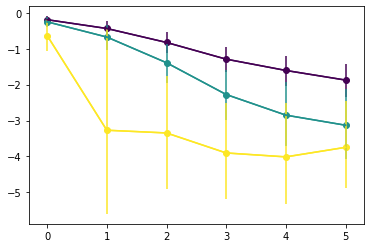

In [134]:
plt.figure()
isize = 4
x = np.arange(6)
ut.plot_bootstrapped_errorbars_hillel(x,couplings[:,[3,5,7],isize,:,8,0].transpose((1,0,2)))

In [236]:
nlight = YY_opto_medium.shape[1]
nsize,ncontrast = 6,6
nN,nP,nQ,nS,nT = [getattr(mdls[0],x) for x in ['nN','nP','nQ','nS','nT']]
max_eig = np.zeros((len(weights_files),nlight,nsize,ncontrast))
min_eig = np.zeros((len(weights_files),nlight,nsize,ncontrast))
vs = np.zeros((len(weights_files),nlight,nsize,ncontrast,2,2))
for iwt,mdl in enumerate(mdls[:nwt]):
    print('model #%d'%iwt)
    this_fprime = mdl.fprimeY(np.nanmean(YY_opto_medium[iwt],2))
    Wmy = getattr(mdls[iwt],'Wmy')
    for ilight in range(nlight):
        Weff = np.zeros((nsize,ncontrast,2,2))
        for istim in range(nN):
            iistim,jjstim = np.unravel_index(istim,(nsize,ncontrast))
            these_phis = this_fprime[ilight,istim]
            Phi = np.diag(these_phis)
            Weff[iistim,jjstim] = Wmy[[0,3]][:,[0,3]] @ Phi[[0,3]][:,[0,3]]
        for istim in range(nN):
            iistim,jjstim = np.unravel_index(istim,(nsize,ncontrast))
    #         plt.subplot(nsize,ncontrast,istim+1)
    #         plt.imshow(Weff[iistim,jjstim],vmin=Weff.min(),vmax=Weff.max())
            w,v = np.linalg.eig(Weff[iistim,jjstim].T)
            vs[iwt,ilight,iistim,jjstim] = v[:,np.argsort(w)]
            max_eig[iwt,ilight,iistim,jjstim] = np.max(w)
            min_eig[iwt,ilight,iistim,jjstim] = np.min(w)

model #0
model #1
model #2


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


model #3
model #4
model #5
model #6
model #7
model #8
model #9
model #10
model #11


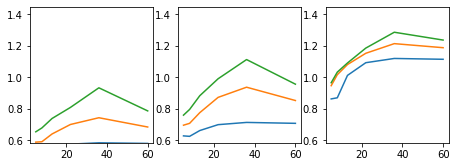

In [237]:
iwt = 0
usize = np.array([5,8,13,22,36,60])
plt.figure(figsize=(7.5,2.5))
for isize in range(3):
    plt.subplot(1,3,isize+1)
    plt.plot(usize,np.nanmean(max_eig[:,1+4*isize][:,:,[1,3,5]],0))
    plt.ylim((max_eig[iwt].min(),max_eig[iwt].max()))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

1.0145685939215443
0.8916807709116606
1.0797529009057312


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


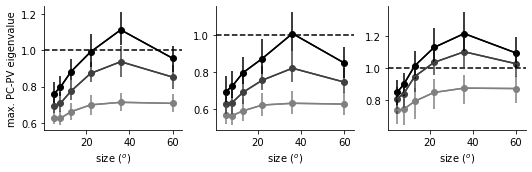

In [238]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_l23 = np.array(((0.5,0.5,0.5),(0.25,0.25,0.25),(0.,0.,0.)))
for iilight,ilight in enumerate([5,3,7]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,max_eig[:,ilight][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_l23)
    plt.axhline(1,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    # plt.legend(['6%','25%','100%'])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
#     plt.ylim((0.4,1.3))
plt.subplot(1,3,1)
plt.ylabel('max. PC-PV eigenvalue')

plt.tight_layout()
# plt.savefig('figures/pc_pv_stability_size_by_3_contrasts_by_vip_opto.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.37362518360617425
-0.5689124882643577


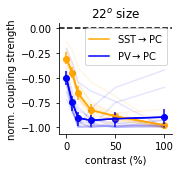

In [239]:
plt.figure(figsize=(2.5,2.5))
isize = 3
ilight = 5
datas = [couplings[:,ilight,isize,:,1,0],couplings[:,ilight,isize,:,3,0]]
colors = [np.array((1,0.65,0)),np.array((0,0,1))]
for data,color in zip(datas,colors):
    mx = np.max(np.abs(data),axis=1)[:,np.newaxis]
    ut.plot_bootstrapped_errorbars_hillel(ucontrast,(data/mx)[:,np.newaxis],pct=(2.5,97.5),colors=color[np.newaxis])
plt.legend([r'SST$\rightarrow$PC',r'PV$\rightarrow$PC'])
for data,color in zip(datas,colors):
    mx = np.max(np.abs(data),axis=1)[:,np.newaxis]
    plt.plot(ucontrast,(data/mx).T,alpha=0.1,c=color)
plt.xlabel('contrast (%)')
plt.ylabel('norm. coupling strength')
plt.title('%d$^o$ size'%usize[isize])
plt.axhline(0,linestyle='dashed',c='k')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/sst_pc_coupling_traces.jpg',dpi=300)

In [240]:
max_eig[:,3+2*isize,:,[1,3,5]].shape

(3, 12, 6)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


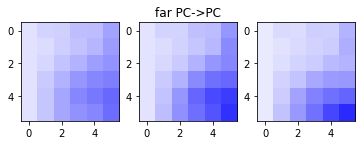

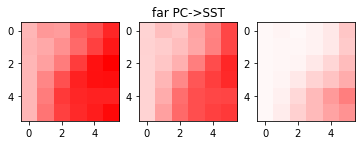

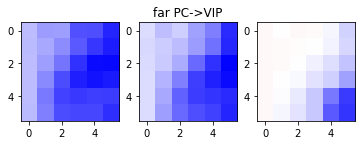

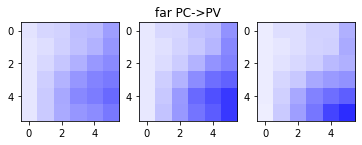

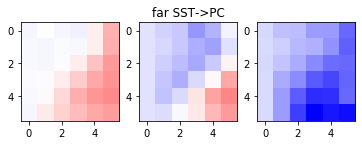

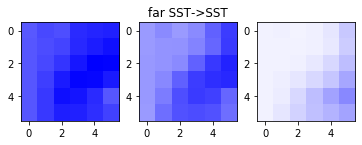

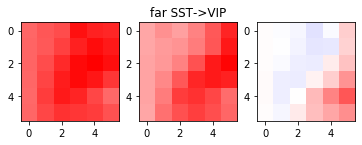

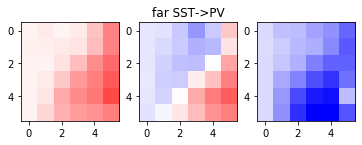

In [125]:
for itype1 in range(nP):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(Xcouplings[:,:,:,:,4+itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5*ilight]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('far %s->%s'%(lbls[itype1],lbls[itype2]))

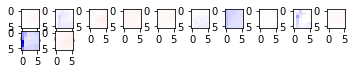

In [253]:
plt.figure()
mx = np.max(np.abs(couplings[:,10,:,:,1,1]))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    plt.imshow(couplings[iwt,10,:,:,1,1],vmin=-mx,vmax=mx,cmap='bwr')
#     plt.axis('off')
cp = couplings.reshape((nwt,-1))
lkat = np.ones((nwt,),dtype='bool')
# lkat = np.max(np.abs(cp),axis=1)<50

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.33952617519641554
0.22530867720703426
-0.16359281323725525


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


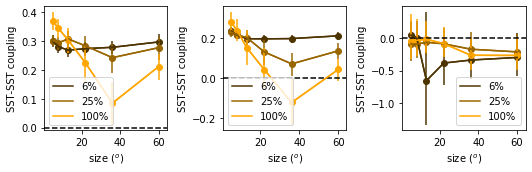

In [243]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[:,1+4*ilight,:,:,1,1][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_sst)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('SST-SST coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/sst_sst_coupling_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.7392399859517991
0.8049114596481154


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.9204735168743363


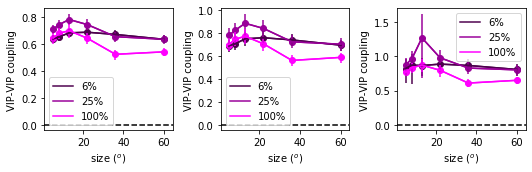

In [244]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[lkat,3+2*ilight,:,:,2,2][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_vip)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-VIP coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/vip_sst_coupling_size_by_3_contrasts_by_3_light_levels.eps')

NameError: name 'lkat' is not defined

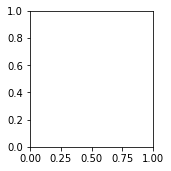

In [116]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[lkat,1+4*ilight,:,:,2,1][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_vip)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-SST coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/vip_sst_coupling_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

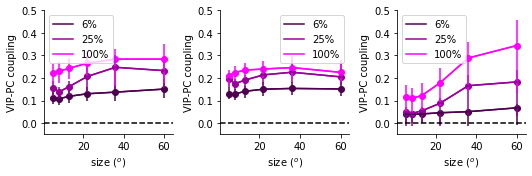

In [122]:
reload(ut)
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_pct_errorbars_hillel(usize,couplings[:,ilight,:,:,2,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(16,84),colors=c_vip)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-PC coupling')
    plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim(-0.05,0.5)
# plt.savefig('figures/vip_pc_coupling_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

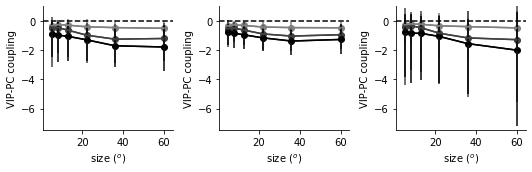

In [120]:
reload(ut)
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_pct_errorbars_hillel(usize,couplings[:,ilight,:,:,8,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(16,84),colors=c_l23)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-PC coupling')
#     plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim(-7.5,1)
# plt.savefig('figures/vip_pc_coupling_size_by_3_contrasts_by_3_light_levels.eps')

In [151]:
sc = YY_opto_small.reshape(YY_opto_small.shape[:2]+(6,6,-1))

In [152]:
smi = sc[:,:,-1,1:,0]/np.max(sc[:,:,:,1:,0],axis=2)

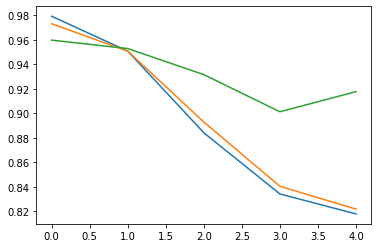

In [153]:
plt.figure()
for ilight in [5,1,9]:
    plt.plot(np.nanmean(smi[:,ilight,:],0))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.7278878753225566
0.6141257398117157


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


1.0227992465695759


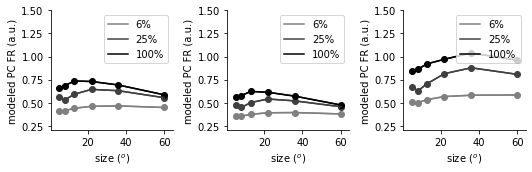

In [123]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,YY_opto_small[:,ilight,:,0].reshape((-1,6,6))[:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_l23)
#     plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('modeled PC FR (a.u.)')
    plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.ylim(0.2,1.5)
plt.tight_layout()
# plt.savefig('figures/modeled_pc_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.595975275563359
0.13255265470553373
1.3652119077072997


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


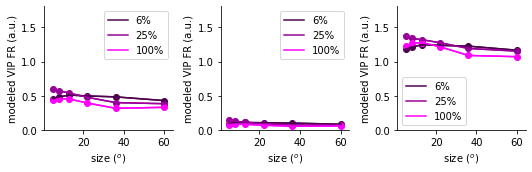

In [124]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,YY_opto_small[:,ilight,:,2].reshape((-1,6,6))[:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_vip)
#     plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('modeled VIP FR (a.u.)')
    plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim(0.,1.8)
# plt.savefig('figures/modeled_vip_size_by_3_contrasts_by_3_light_levels.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.7550497002352771
0.6076441236465289
0.9027097557828473


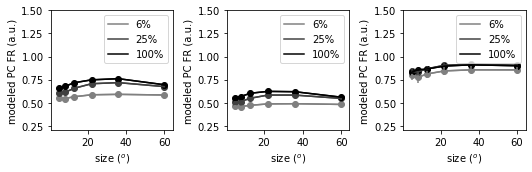

In [156]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,phis[:,ilight,:,:,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_l23)
#     plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('modeled PC FR (a.u.)')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
    plt.ylim(0.2,1.5)
# plt.savefig('figures/modeled_pc_size_by_3_contrasts_by_3_light_levels.eps')

In [284]:
phis.shape

(84, 11, 6, 6, 16)

In [207]:
couplings.shape

(84, 6, 6, 16, 16)

In [106]:
c_l4 = np.array(((0,0.3,0),(0,0.6,0),(0,1,0)))
c_l23 = np.array(((0.5,0.5,0.5),(0.25,0.25,0.25),(0.,0.,0.)))
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
c_vip = np.array(((0.3,0,0.3),(0.6,0,0.6),(1,0,1)))
c_pv = np.array(((0,0,0.3),(0,0,0.6),(0,0,1)))
colors = [c_l4,c_l23,c_sst,c_vip,c_pv]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.17511181108702614
-0.18437305227692252


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.9199933930828017


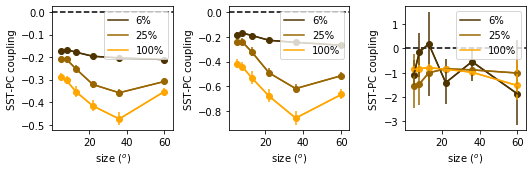

In [248]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[lkat,5*ilight,:,:,1,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_sst)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('SST-PC coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/sst_sst_coupling_size_by_3_contrasts.eps')

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


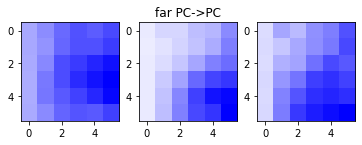

In [100]:
for itype1 in range(8,9):
    for itype2 in range(0,1):
        plt.figure()
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            data = np.nanmedian(couplings[:,5*ilight,:,:,itype1,itype2],0)
            mx = np.max(np.abs(data))
            plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('%s->%s'%('far PC',lbls[itype2]))

In [26]:
ucontrast = np.array([0,6,12,25,50,100])

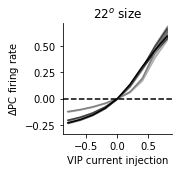

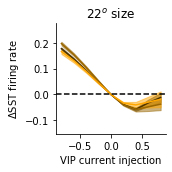

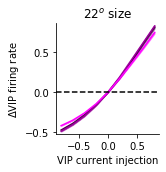

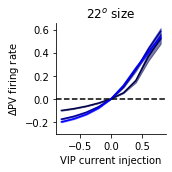

In [96]:
iwt = 0
data = np.zeros((nwt,YY_opto_medium[0].shape[0],6,6))
yoffset = 0.1
opto_range = slice(1,10)
these_opto_levels = opto_levels[opto_range]
for itype in [0,1,2,3]:
    plt.figure(figsize=(2.5,2.5))
    isize = 3
    tlast = 200
    icontrasts = [1,3,5]
    these_colors = colors[itype+1]
    for iwt in range(nwt):
        data[iwt] = np.nanmean(YY_opto_medium[iwt][:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
        data[iwt] = (data[iwt] - data[iwt,5])#/(data[iwt] + data[iwt,5])
    for iicontrast,icontrast in enumerate(icontrasts):
        this_data = data[:,:,isize,icontrast]
        this_color = these_colors[iicontrast]
        mn = np.mean(this_data,0)[opto_range]
        sem = np.std(this_data,0)[opto_range]/np.sqrt(this_data.shape[0])
        plt.plot(these_opto_levels,mn,c=this_color)
        plt.fill_between(these_opto_levels,mn-sem,mn+sem,alpha=0.5,color=this_color)
        plt.ylim(((mn-sem-yoffset).min(),(mn+sem+yoffset).max()))
#     plt.legend(['%d%% contrast'%uc for uc in ucontrast[icontrasts]])
    plt.title('%d$^o$ size'%usize[isize])
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xlabel('VIP current injection')
    plt.ylabel('$\Delta$%s firing rate'%lbls[itype])
    ut.erase_top_right()
    plt.tight_layout()
    plt.savefig('figures/%s_vip_current_injection.jpg'%lbls[itype],dpi=300)

In [203]:
import calnet.utils
import sim_utils

In [69]:
nfiles = nwt#len(weights_files)
Ts = np.zeros((nfiles,nQ))
Ks = np.zeros((nfiles,nQ))
Wmys = np.zeros((nfiles,nQ,nQ))
Wmxs = np.zeros((nfiles,nP,nQ))
s02s = np.zeros((nfiles,nQ))
YYs = np.zeros((nfiles,6,6,nQ*nS*nT))
XXs = np.zeros((nfiles,6,6,nP*nS*nT))
couplings = np.zeros((nfiles,6,6,nQ*nS*nT,nQ*nS*nT))
Xcouplings = np.zeros((nfiles,6,6,nP*nS*nT,nQ*nS*nT))
for iwt,weights_file in enumerate(weights_files):
    Wstar_dict = np.load(weights_file,allow_pickle=True)[()]
    Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h = Wstar_dict['as_list']
    WWmy = calnet.utils.gen_Weight_k_kappa_t(Wmy,K,kappa,T)
    WWmx = calnet.utils.gen_Weight_k_kappa_t(Wmx,K,kappa,T)
    tiled_s02 = np.tile(s02,nS*nT)
    Ts[iwt] = T
    Ks[iwt] = K
    Wmys[iwt] = Wmy
    Wmxs[iwt] = Wmx
    s02s[iwt] = s02
    YYs[iwt] = sim_utils.f_miller_troyer(Eta,Xi**2+tiled_s02).reshape((6,6,nQ*nS*nT))
    XXs[iwt] = XX.reshape((6,6,nP*nS*nT))
    for istim in range(nN):
        iistim,jjstim = np.unravel_index(istim,(6,6))
        Phi = np.diag(calnet.utils.fprime_miller_troyer(Eta[istim],Xi[istim]**2+tiled_s02))
        couplings[iwt,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
        Xcouplings[iwt,iistim,jjstim] = WWmx @ Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
# couplings = np.reshape(couplings,(couplings.shape[0],6,6,couplings.shape[2],couplings.shape[3]))
# Xcouplings = np.reshape(Xcouplings,(Xcouplings.shape[0],6,6,Xcouplings.shape[2],Xcouplings.shape[3]))

NameError: name 'nQ' is not defined

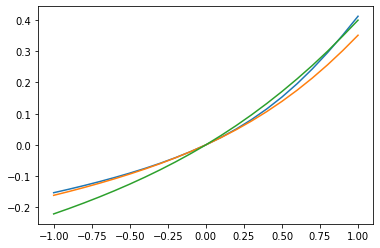

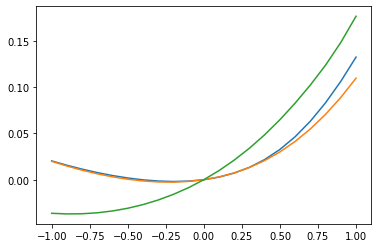

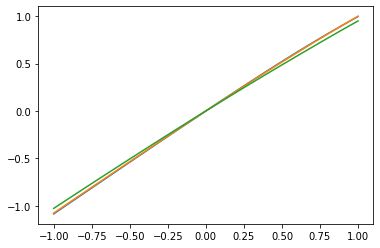

In [277]:
for itype in [0,1,2]:
    plt.figure()
    isize = 5
    tlast = 1000
    data = np.nanmean(YY_opto[:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
    for icontrast in [1,3,5]:
        plt.plot(opto_levels,data[:,isize,icontrast]-data[10,isize,icontrast])

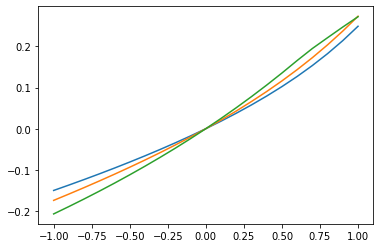

In [191]:
plt.figure()
itype = 0
isize = 2
tlast = 1000
data = np.nanmean(YY_opto[:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
for icontrast in [1,3,5]:
    plt.plot(opto_levels,data[:,isize,icontrast]-data[10,isize,icontrast])

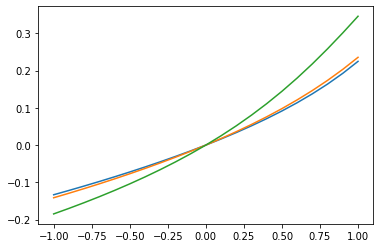

In [193]:
plt.figure()
itype = 0
isize = 5
tlast = 1000
data = np.nanmean(YY_opto[:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
for icontrast in [1,3,5]:
    plt.plot(opto_levels,data[:,isize,icontrast]-data[10,isize,icontrast])

In [13]:
pdb.pm()


> /Users/dan/Documents/code/adesnal/calnet/dynamics.py(142)predict_YY_current_injection()
-> YY = np.zeros((Niter+1,YY0.shape[1]))
(Pdb) Nfix
*** NameError: name 'Nfix' is not defined
(Pdb) YY0.shape
(16,)
(Pdb) exit


In [215]:
reload(dyn)
YY_fix = dyn.compute_steady_state_Model(mdl,Niter=int(1.5e3),fix_dim=np.arange(mdl.nQ),Ny=25,dt=1e-1)

0


/Users/dan/Documents/code/adesnal/calnet/utils.py:632: RuntimeWarning: overflow encountered in square
  A = 0.5*mu*(1+ssp.erf(u))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


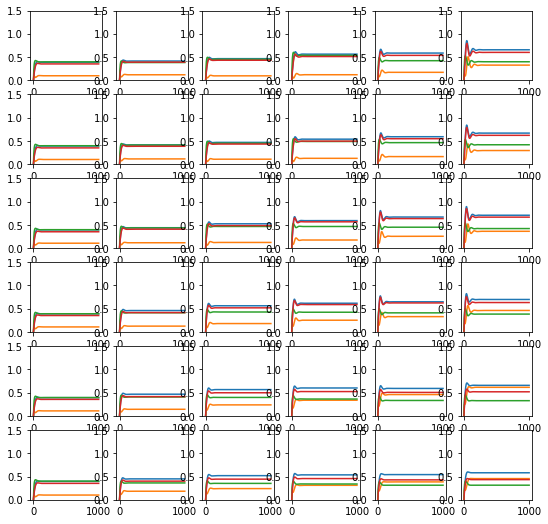

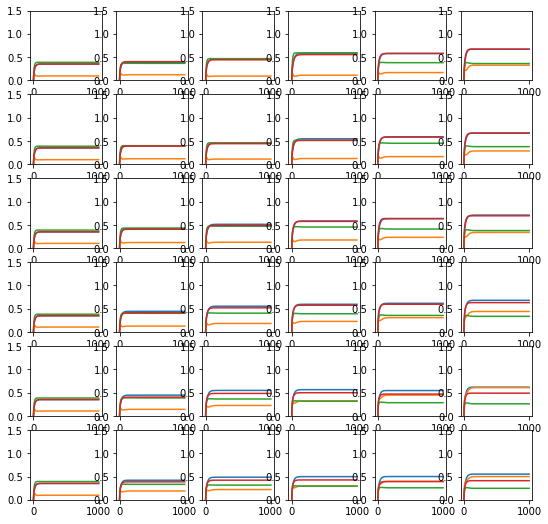

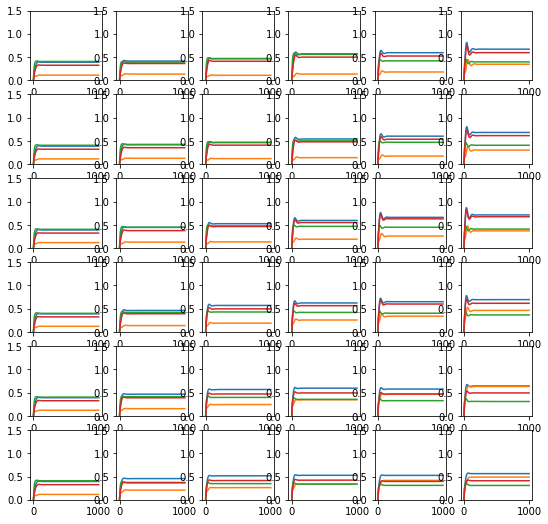

In [50]:
import pyute as ut
# ut.mkdir('figures/dynamics_simulations/200724a/')
for iwt in range(nwt):
    mag = 1.5
    plt.figure(figsize=(6*mag,6*mag))
    for icelltype in range(4):
        for istim in range(36):
            plt.subplot(6,6,istim+1)
            plt.plot(YY_ss[iwt][istim,:,icelltype]) #-YY_ss[imodel][istim,-1,icelltype])
            plt.ylim((0,1.5))
#     plt.savefig('figures/dynamics_simulations/200724a/%d.jpg'%iwt)

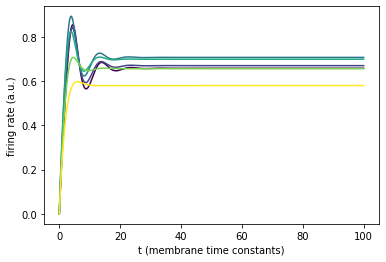

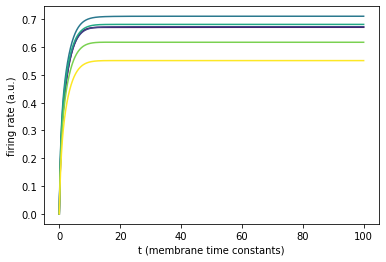

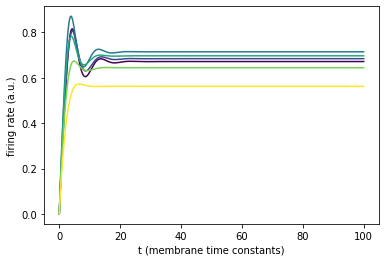

In [51]:
colors = plt.cm.viridis(np.linspace(0,1,6))
ut.mkdir('figures/dynamics_simulations_inset')
for iwt in range(nwt):
    plt.figure()
    tlim = 1001
    t = np.arange(tlim)*dt
    data = YY_ss[iwt].reshape((6,6)+YY_ss[iwt].shape[1:])
    itype = 0
    icontrast = 5
    for isize in np.arange(6):
        plt.plot(t,data[isize,icontrast,:tlim,itype],c=colors[isize])
    plt.xlabel('t (membrane time constants)')
    plt.ylabel('firing rate (a.u.)')
#     plt.savefig('figures/dynamics_simulations_inset/%d.jpg'%iwt)

In [52]:
plt.figure()
for ilight in [0,5,10]:
    plt.plot(YY_opto[0,ilight,-1,:,0])

TypeError: list indices must be integers or slices, not tuple

<Figure size 432x288 with 0 Axes>

TypeError: list indices must be integers or slices, not tuple

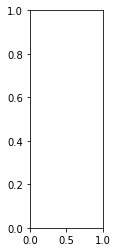

In [53]:
for itype in range(4):
    plt.subplot(1,4,itype+1)
    plt.imshow(YY_ss[:,-1,itype].reshape((6,6)))

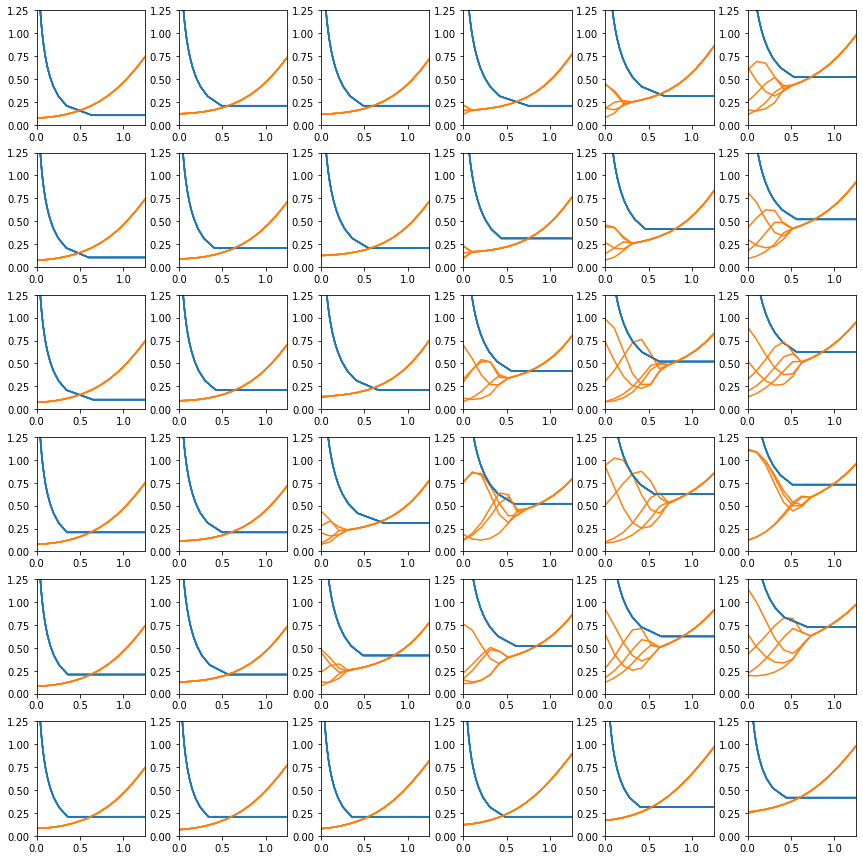

In [220]:
mag = 2
ix = 0
iy = 1
max_val = 2.5
Ny = 25
xvals = np.linspace(0,max_val,Ny)
plt.figure(figsize=(6*mag,6*mag))
for istim in range(YY_fix.shape[1]):
    plt.subplot(6,6,istim+1)
    for it in [-400,-300,-200,-100,-1]:
        plt.plot(YY_fix[iy,istim,:,it,ix],xvals,c='C0')
        plt.plot(xvals,YY_fix[ix,istim,:,it,iy],c='C1')
        plt.xlim((0,1.25))
        plt.ylim((0,1.25))
plt.tight_layout()

In [82]:
def f_basic(mu,sigma=1):
    return utils.f_miller_troyer(mu,sigma)
def run_small_sim(W,h,r0,f=f_basic,Niter=int(1e3),dt=1e-1):
    def drdt(r):
        return -r + f(r @ W + h)
    r = r0
    for t in range(Niter):
        r = r + dt*drdt(r)
    return r
    

In [253]:
# W = np.array(((1,2),(-3,-2)))
W = 2*np.array(((1,1),(-2,-1)))
# hs = [np.array((1,0.99)),np.array((1,1)),np.array((1,1.01))]
hs = [np.array((1,0.49)),np.array((1,0.75)),np.array((1,0.51))]
# h2 = np.array((1,1.25))
r0 = np.array((1,1))
nstim = 100
inputs = np.linspace(-2,2,nstim)
rs = [np.zeros((nstim,2)) for h in hs]
for iinp in range(len(hs)):
    for istim in range(nstim):
        rs[iinp][istim] = run_small_sim(W,hs[iinp]*inputs[istim],r0,f=lambda mu: utils.f_miller_troyer(mu,0.05))
        r0 = rs[iinp][istim].copy()

In [227]:
ww,vv = np.linalg.eig(W.T)

In [228]:
-h2 @ np.linalg.inv(W-1)

array([-0.5 ,  0.25])

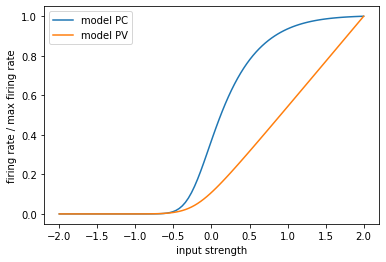

In [255]:
for iinp in (1,): #range(len(hs)):
    plt.figure()
    plt.plot(inputs,rs[iinp]/rs[iinp].max(0)[np.newaxis,:])
    plt.legend(['model PC','model PV'])
    plt.xlabel('input strength')
    plt.ylabel('firing rate / max firing rate')
plt.savefig('figures/toy_model_pc_pv.jpg',dpi=300)

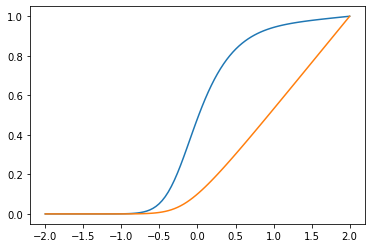

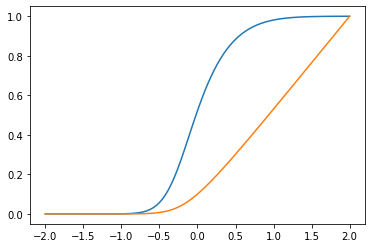

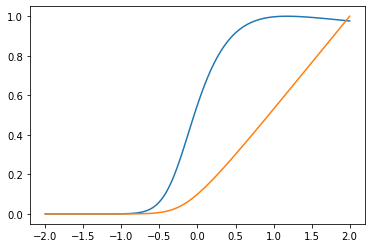

In [238]:
for iinp in range(len(hs)):
    plt.figure()
    plt.plot(inputs,rs[iinp]/rs[iinp].max(0)[np.newaxis,:])
# plt.plot(inputs,r2)

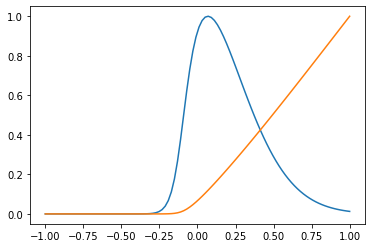

In [220]:
plt.figure()
plt.plot(inputs,r2/r2.max(0)[np.newaxis,:])

(0, 0.04)

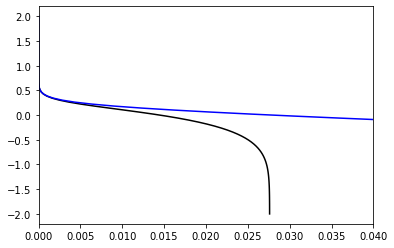

In [234]:
plt.figure()
plt.plot(r[:,0],-inputs,c='k')
plt.plot(r[:,1],-inputs,c='b')
plt.xlim((0,0.04))